https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Importing Dependencies 

In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install seaborn

In [3]:
#pip install scikit-learn

In [4]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd   #for handling dataset
import  numpy as np # for numerical calculation
import matplotlib.pyplot as plt # for plotting data 
import seaborn as sns # for plotting library
from sklearn.model_selection import StratifiedShuffleSplit # for stratified splitting
from imblearn.over_sampling import SMOTE # for performing SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve


In [6]:
pd.set_option('display.max_columns', None)


# functions

In [7]:
def find_duplicate_columns(df):
    duplicate_columns = []
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            other_col = df.iloc[:, y]
            if col.equals(other_col):
                duplicate_columns.append(df.columns.values[y])
    return duplicate_columns

In [8]:
def categorize_amount(amount):
    if amount <= 2500:
        return '0-2500'
    else:
        return '2500-above'

# loading the main data file

In [9]:
creditcard_df = pd.read_csv('creditcard.csv')

# EDA

In [10]:
creditcard_df.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [11]:
creditcard_df.shape

(284807, 31)

In [12]:
creditcard_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
267954  163000.0  0.084068  1.145241 -2.035386 -0.459971  0.903935 -0.934016   
173086  121352.0  1.907033 -0.091103 -1.238093  0.954368 -0.069984 -0.845947   
239429  150106.0  1.706830 -0.773953 -1.739020  0.315908  1.848784  4.039281   
64211    51077.0 -1.308023  0.025507  1.772405  1.174699 -1.398750  0.514684   
34945    37891.0  0.581367 -0.936623  1.259066 -1.883896 -1.256057 -0.338276   

              V7        V8        V9       V10       V11       V12       V13  \
267954  1.061430  0.173016 -0.615638 -0.793918  0.772076  0.162814 -1.100541   
173086  0.132470 -0.249636  1.250003 -0.878396 -0.779542  1.232296  0.801196   
239429 -0.899787  1.039855  0.747908  0.119588 -0.148646  0.446714 -0.036730   
64211  -0.317140  0.334729  0.418451  0.209545 -0.403176 -0.779787 -0.864304   
34945  -0.837992  0.084764 -1.686983  1.644718  1.119860 -1.705202 -2.310887   

             V14       V15       V16       V17       V18       V19       V20  \
267954 -0.107722 -1.299830  0.118182  0.646955  0.424227 -0.152847 -0.365122   
173086 -1.705906 -1.534733 -0.678585  1.175676 -0.554350  0.471514 -0.092463   
239429  0.193435  0.864674  0.312028 -0.745467 -0.239666 -0.620477  0.063461   
64211   0.023651  2.810391  0.017517  0.272041  0.476561  0.836580 -0.330543   
34945   0.017760  0.272033 -0.367960  0.524110  0.421828 -0.448428 -0.479717   

             V21       V22       V23       V24       V25       V26       V27  \
267954  0.240757  0.586156  0.000492  0.651991 -0.376608  0.488596 -0.277332   
173086 -0.378811 -0.687190  0.172554 -0.029556  0.029623 -0.511571  0.031238   
239429 -0.099978 -0.542240  0.303346  0.634550 -0.380682 -0.931724  0.055261   
64211   0.228987  1.044109  0.169037  0.130919 -0.540363  0.670680 -0.394734   
34945  -0.153528 -0.026254  0.234304  0.097941 -0.893003 -0.442038 -0.143050   

             V28  Amount  Class  
267954 -0.070921   42.81      0  
173086 -0.013511   46.50      0  
239429 -0.010056  124.51      0  
64211  -0.277938  134.70      0  
34945  -0.298931    3.00      0

In [13]:
find_duplicate_columns(creditcard_df)

[]

There is no duplicate columns

In [14]:
sset = ['Amount', 'Class']

In [15]:
creditcard_df[sset].describe()

Amount          Class
count  284807.000000  284807.000000
mean       88.349619       0.001727
std       250.120109       0.041527
min         0.000000       0.000000
25%         5.600000       0.000000
50%        22.000000       0.000000
75%        77.165000       0.000000
max     25691.160000       1.000000

plotting 

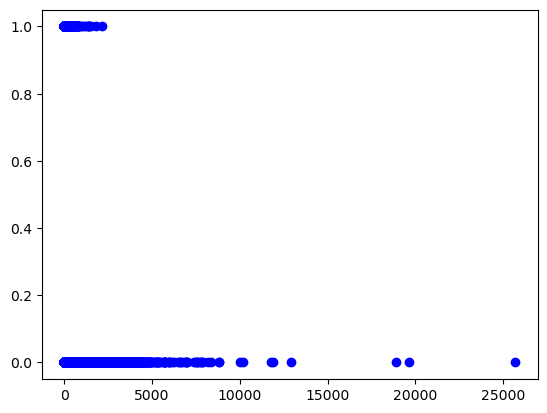

In [16]:
# Create scatter plot
plt.scatter(creditcard_df['Amount'], creditcard_df['Class'], c="blue")

# Show the plot
plt.show()

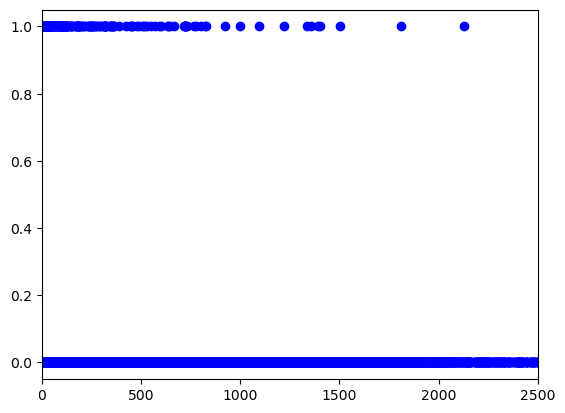

In [17]:
# Create scatter plot
plt.scatter(creditcard_df['Amount'], creditcard_df['Class'], c="blue")

plt.xlim(0,2500)

# Show the plot
plt.show()

Fruad transanction is below the amount of 2500

<Axes: >

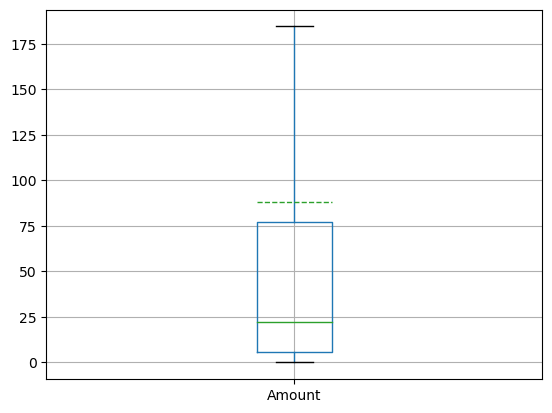

In [18]:
creditcard_df[['Amount']].boxplot(showfliers=False, meanline=True, showmeans=True)


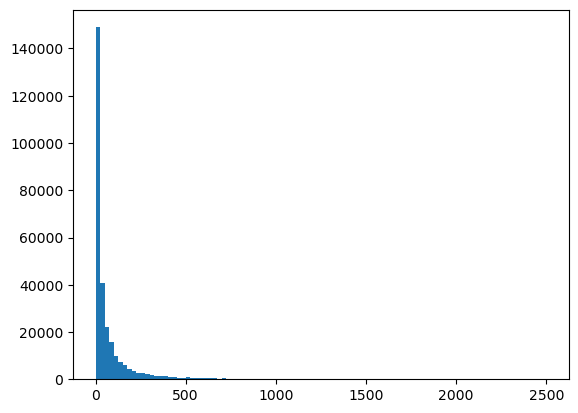

In [19]:
plt.hist(creditcard_df['Amount'], bins= 100, range = (0, 2500))
plt.show()

<Axes: >

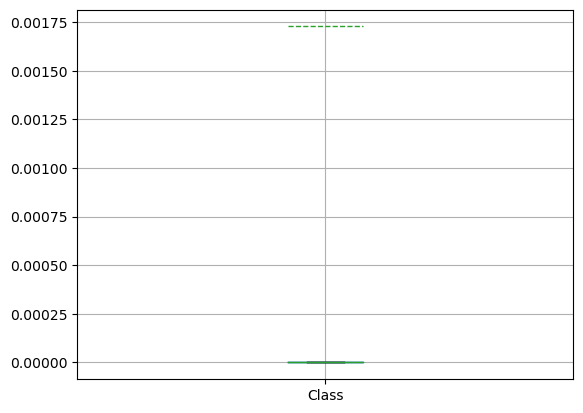

In [20]:
creditcard_df[['Class']].boxplot(showfliers=False, meanline=True, showmeans=True)

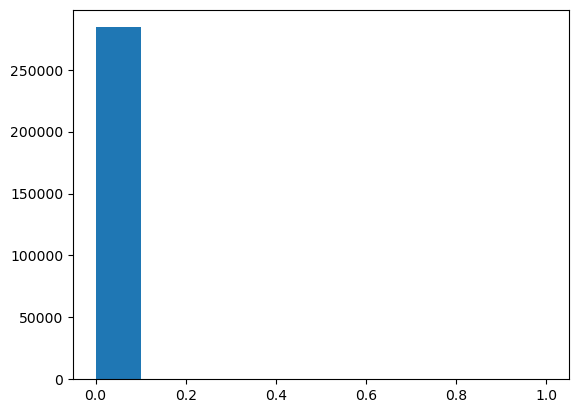

In [21]:
plt.hist(creditcard_df['Class'])
plt.show()

In [22]:
creditcard_df['Class'].sum(axis =0)

492

Hihgly imbalanced data 

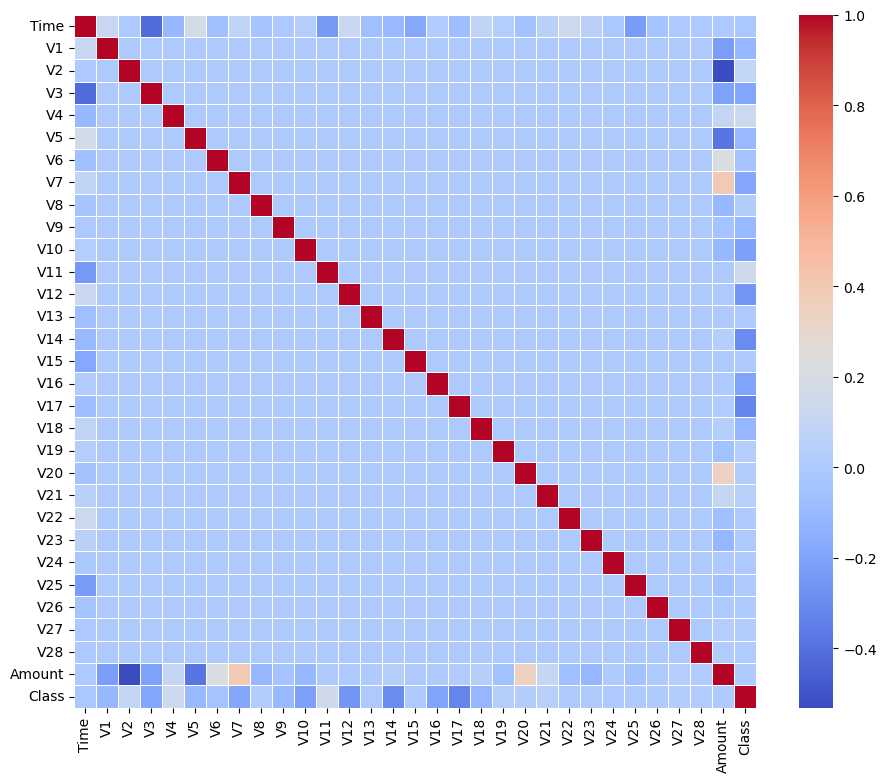

In [23]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr = creditcard_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

most of the columns are uncorrelated so we will use all of them for Supervised Machine Learning and for the purpose of feature Selection we are not merging the same columns

***Group by anaylsis***

*class*

In [24]:
grouped_class_df = creditcard_df.groupby('Class')

In [25]:
grouped_class_df.describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1                                          \
            75%       max     count      mean       std       min       25%   
Class                                                                         
0      139333.0  172792.0  284315.0  0.008258  1.929814 -56.40751 -0.917544   
1      128483.0  170348.0     492.0 -4.771948  6.783687 -30.55238 -6.036063   

                                           V2                                 \
            50%       75%       max     count      mean       std        min   
Class                                                                          
0      0.020023  1.316218  2.454930  284315.0 -0.006271  1.636146 -72.715728   
1     -2.342497 -0.419200  2.132386     492.0  3.623778  4.291216  -8.402154   

                                                      V3                      \
            25%       50%       75%        max     count      mean       std   
Class                                                                          
0     -0.599473  0.064070  0.800446  18.902453  284315.0  0.012171  1.459429   
1      1.188226  2.717869  4.971257  22.057729     492.0 -7.033281  7.110937   

                                                                V4            \
             min       25%       50%       75%       max     count      mean   
Class                                                                          
0     -48.325589 -0.884541  0.182158  1.028372  9.382558  284315.0 -0.007860   
1     -31.103685 -8.643489 -5.075257 -2.276185  2.250210     492.0  4.542029   

                                                                          V5  \
            std       min       25%       50%       75%        max     count   
Class                                                                          
0      1.399333 -5.683171 -0.850077 -0.022405  0.737624  16.875344  284315.0   
1      2.873318 -1.313275  2.373050  4.177147  6.348729  12.114672     492.0   

                                                                     \
           mean       std         min       25%       50%       75%   
Class                                                                 
0      0.005453  1.356952 -113.743307 -0.689398 -0.053457  0.612181   
1     -3.151225  5.372468  -22.105532 -4.792835 -1.522962  0.214562   

                        V6                                                     \
             max     count      mean       std        min       25%       50%   
Class                                                                           
0      34.801666  284315.0  0.002419  1.329913 -26.160506 -0.766847 -0.273123   
1      11.095089     492.0 -1.397737  1.858124  -6.406267 -2.501511 -1.424616   

                                  V7                                           \
            75%        max     count      mean       std        min       25%   
Class                                                                           
0      0.399619  73.301626  284315.0  0.009637  1.178812 -31.764946 -0.551442   
1     -0.413216   6.474115     492.0 -5.568731  7.206773 -43.557242 -7.965295   

                                             V8                      \
            50%       75%         max     count      mean       std   
Class                                                                 
0      0.041138  0.571019  120.589494  284315.0 -0.000987  1.161283   
1     -3.034402 -0.945954    5.802537     492.0  0.570636  6.797831   

                                                                 V9            \
             min       25%       50%       75

In [26]:
grouped_class_df.size()

Class
0    284315
1       492
dtype: int64

In [27]:
grouped_class1_df = grouped_class_df.get_group(1)

In [28]:
grouped_class1_df.sample(3)

Time        V1        V2         V3        V4        V5        V6  \
268375  163181.0 -5.238808  0.623013  -5.784507  1.678889 -0.364432 -0.477295   
150663   93853.0 -5.839192  7.151532 -12.816760  7.031115 -9.651272 -2.938427   
251891  155548.0  1.878230  1.325630  -2.333469  4.233151  1.355184 -0.853508   

               V7        V8        V9        V10       V11        V12  \
268375  -4.276132 -0.695173 -2.971644  -5.529131  1.779505  -4.836159   
150663 -11.543207  4.843627 -3.494276 -13.320789  8.460244 -17.003289   
251891   0.716025 -0.164910 -1.502345   0.259411  1.451238  -0.280523   

             V13        V14       V15        V16        V17       V18  \
268375 -1.208992  -2.901190  0.281878  -5.539544  -7.290960 -4.897766   
150663  0.101557 -14.094452  0.747031 -12.661696 -18.912494 -6.626975   
251891 -0.756794  -2.757557 -1.706285   1.587460   1.929350  1.189433   

             V19       V20       V21       V22       V23       V24       V25  \
268375 -0.308609 -0.203270 -0.326140  1.509239 -0.215966 -0.245727  0.893041   
150663  4.008921  0.055684  2.462056  1.054865  0.530481  0.472670 -0.275998   
251891 -1.530162 -0.226108 -0.152131 -0.360736  0.043414 -0.242380  0.171098   

             V26       V27       V28  Amount  Class  
268375  0.865758  0.854657 -0.964482   39.98      1  
150663  0.282435  0.104886  0.254417  316.06      1  
251891 -0.002601 -0.026667  0.005238    7.06      1

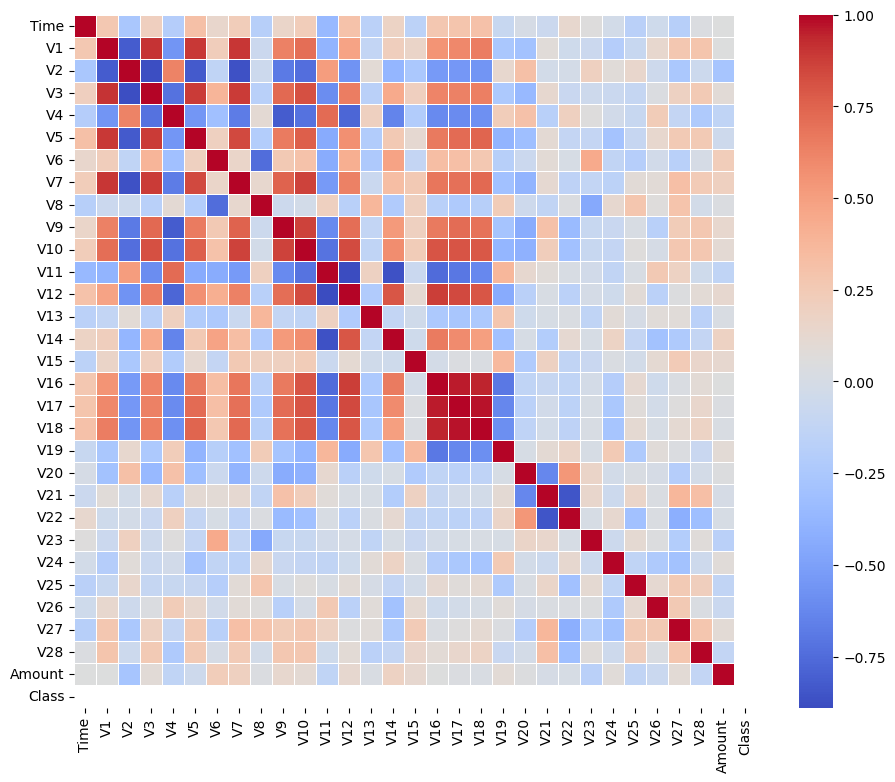

In [29]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_class1_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

There are certain varibles for eg. V1 and V3 are highly correlated for fraudulent transaction

In [30]:
grouped_class0_df = grouped_class_df.get_group(0)

In [31]:
grouped_class0_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
284179  172225.0  0.208584  0.998680 -0.829834 -0.786164  1.429393 -0.175395   
224311  143733.0 -1.352460  0.101577  1.108768 -0.708474 -0.619646 -0.625436   
108788   71074.0 -1.628583  0.280126  1.335226 -1.878543 -2.622408  0.143603   
29236    35373.0  1.132043  0.256992  0.910748  2.334535 -0.424102  0.179029   
197941  132246.0 -0.904770  0.785525 -0.237407 -3.958736  0.404546 -1.446964   

              V7        V8        V9       V10       V11       V12       V13  \
284179  0.938934 -0.018764  0.025153 -0.840660 -1.550688 -0.450504  0.144562   
224311  0.041795  0.219454 -1.214384 -0.301616 -1.217698  0.011649  0.598069   
108788  1.387173  0.059650  0.945215 -2.055276 -0.436878  0.756685  1.016236   
29236  -0.436002  0.248571 -0.455201  0.885306  0.533361 -0.377398 -1.448254   
197941  0.893376  0.274190  1.224685 -2.448692 -1.092699  0.179379 -1.162416   

             V14       V15       V16       V17       V18       V19       V20  \
284179 -1.065194 -0.114093  0.569709  0.056886  0.029517  0.080592  0.043826   
224311  0.194905  0.578978 -1.980679  0.301011  1.535992  0.084456 -0.505354   
108788 -0.213393  1.504908  0.518113 -0.770727  0.749493 -0.562528 -0.437383   
29236   0.554301  0.258118  1.300560 -1.043549  0.894421 -0.796009 -0.203737   
197941  0.839203  0.398415 -0.539577 -0.406313 -0.234171 -0.101525 -0.280641   

             V21       V22       V23       V24       V25       V26       V27  \
284179 -0.402511 -1.000258 -0.021548 -0.480937 -0.302120  0.180133  0.223859   
224311 -0.259545 -0.332660 -0.472868  0.038912  0.579090 -0.406915 -0.021041   
108788  0.305000  1.107102 -0.363416  0.473730  0.233582 -0.700266  0.087905   
29236   0.156291  0.317681 -0.097767 -0.032176  0.395944  0.104637 -0.002602   
197941 -0.184716 -0.560150 -0.150417  0.536800  0.343040 -1.291635  0.224677   

             V28  Amount  Class  
284179  0.073496    3.56      0  
224311 -0.147901   77.20      0  
108788 -0.174688  398.00      0  
29236   0.014016   10.65      0  
197941  0.120268    1.99      0

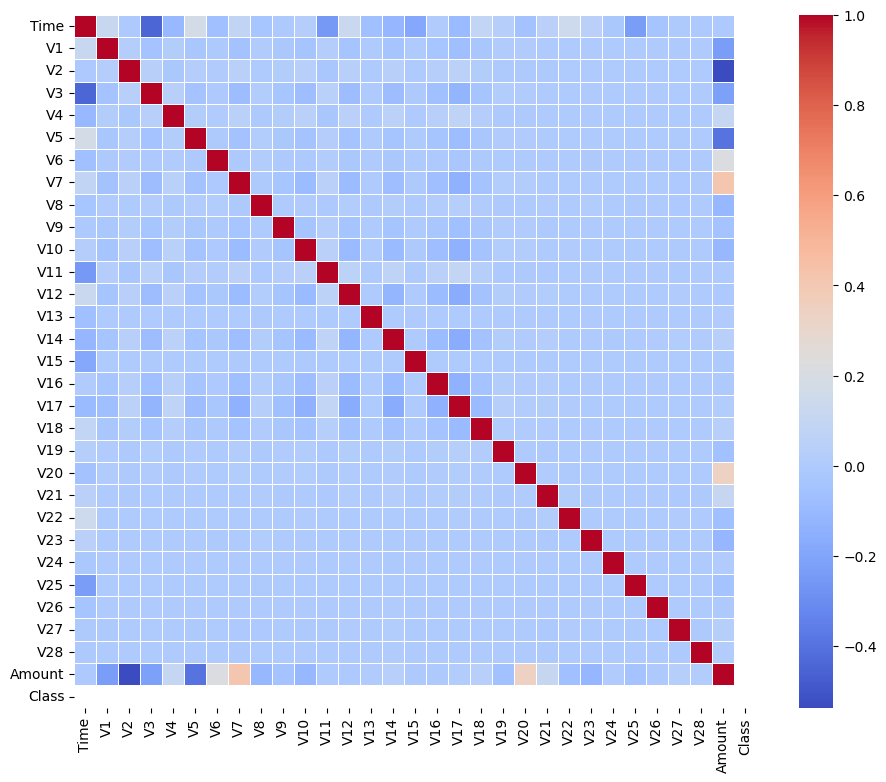

In [32]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_class0_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

For the observation purpose we can observe that in case of both fraudulent and non fraudulent transactions the variables from V1 to V17 are correlated 

*Amount*

In [33]:
creditcard_df['Amount_Group'] = creditcard_df['Amount'].apply(categorize_amount)

In [34]:
creditcard_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
72054    54548.0 -1.130235 -0.396668  1.326885 -1.521651 -0.239949 -1.149648   
269272  163612.0  1.464728 -1.687449 -0.664443  0.691616 -1.159118  0.216057   
178870  123820.0 -1.123015  0.877992  0.124689  0.006875  2.100234  4.659302   
40960    40478.0 -0.883601  0.546330  2.258005 -0.429454  0.104730 -0.493201   
143191   85182.0  1.176379  1.021750 -1.780923  1.429078  1.039141 -0.900585   

              V7        V8        V9       V10       V11       V12       V13  \
72054   0.160416  0.166297 -1.204608 -0.621435  1.013147 -0.877084 -1.779269   
269272 -0.649589  0.069726 -0.330569  1.071654  0.143036  0.242054 -0.115522   
178870 -0.186973  1.669632 -0.306406 -0.750203 -0.720709  0.330023 -0.402411   
40960   1.247803 -0.294946 -0.152439 -0.944580 -0.635163  0.590224  0.788765   
143191  0.442600  0.045193 -0.351829 -1.361433  2.069426 -0.996343 -2.406134   

             V14       V15       V16       V17       V18       V19       V20  \
72054  -1.063829 -0.535601  0.134538  0.147769  2.675074 -2.700413 -0.384260   
269272  0.207009  0.098647 -0.725113 -0.831480  2.354744 -1.247917 -0.062631   
178870  0.196942 -0.425861 -0.849881  0.451788 -0.651045  1.180203  0.229436   
40960  -0.676252 -0.937029 -0.058133 -0.475456 -0.778695 -0.540287  0.178985   
143191 -2.730301  0.890550  1.139820  2.743015  1.759770 -0.769283 -0.181842   

             V21       V22       V23       V24       V25       V26       V27  \
72054  -0.034319 -0.122656  0.113664  0.361958 -0.106352  0.296521  0.005758   
269272  0.069570  0.091295 -0.092964 -0.525013 -0.320683 -0.579818  0.021406   
178870 -0.493260 -1.427163  0.056891  0.622505  0.476645 -0.761795  0.232045   
40960  -0.239993 -0.570736 -0.102895  0.419180  0.420975  0.022674 -0.192247   
143191 -0.176093 -0.522495 -0.208286 -0.693779  0.721935 -0.254574  0.037019   

             V28  Amount  Class Amount_Group  
72054   0.147132  100.90      0       0-2500  
269272  0.011366  307.00      0       0-2500  
178870  0.077031   64.33      0       0-2500  
40960  -0.158126   79.95      0       0-2500  
143191  0.075888    4.49      0       0-2500

In [35]:
grouped_amount_df = creditcard_df.groupby('Amount_Group')

In [36]:
grouped_amount_df.size()

Amount_Group
0-2500        284367
2500-above       440
dtype: int64

In [37]:
grouped_amountlow_df = grouped_amount_df.get_group('0-2500') 

In [38]:
col = grouped_amountlow_df.columns

In [39]:
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Amount_Group'],
      dtype='object')

In [40]:
col1 = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

In [41]:
col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

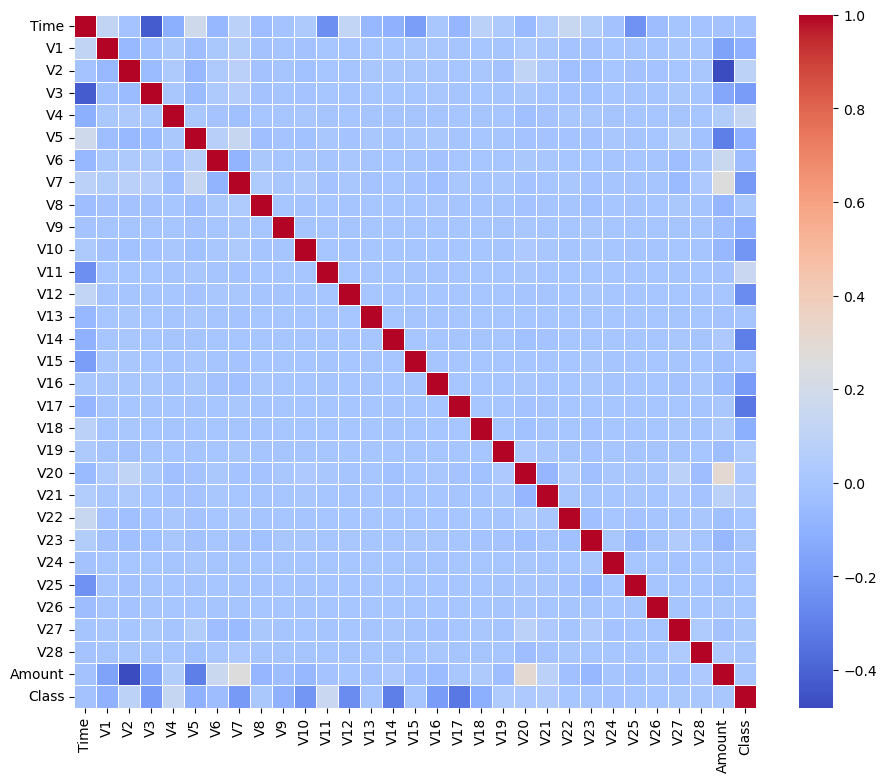

In [42]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_amountlow_df[col1].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


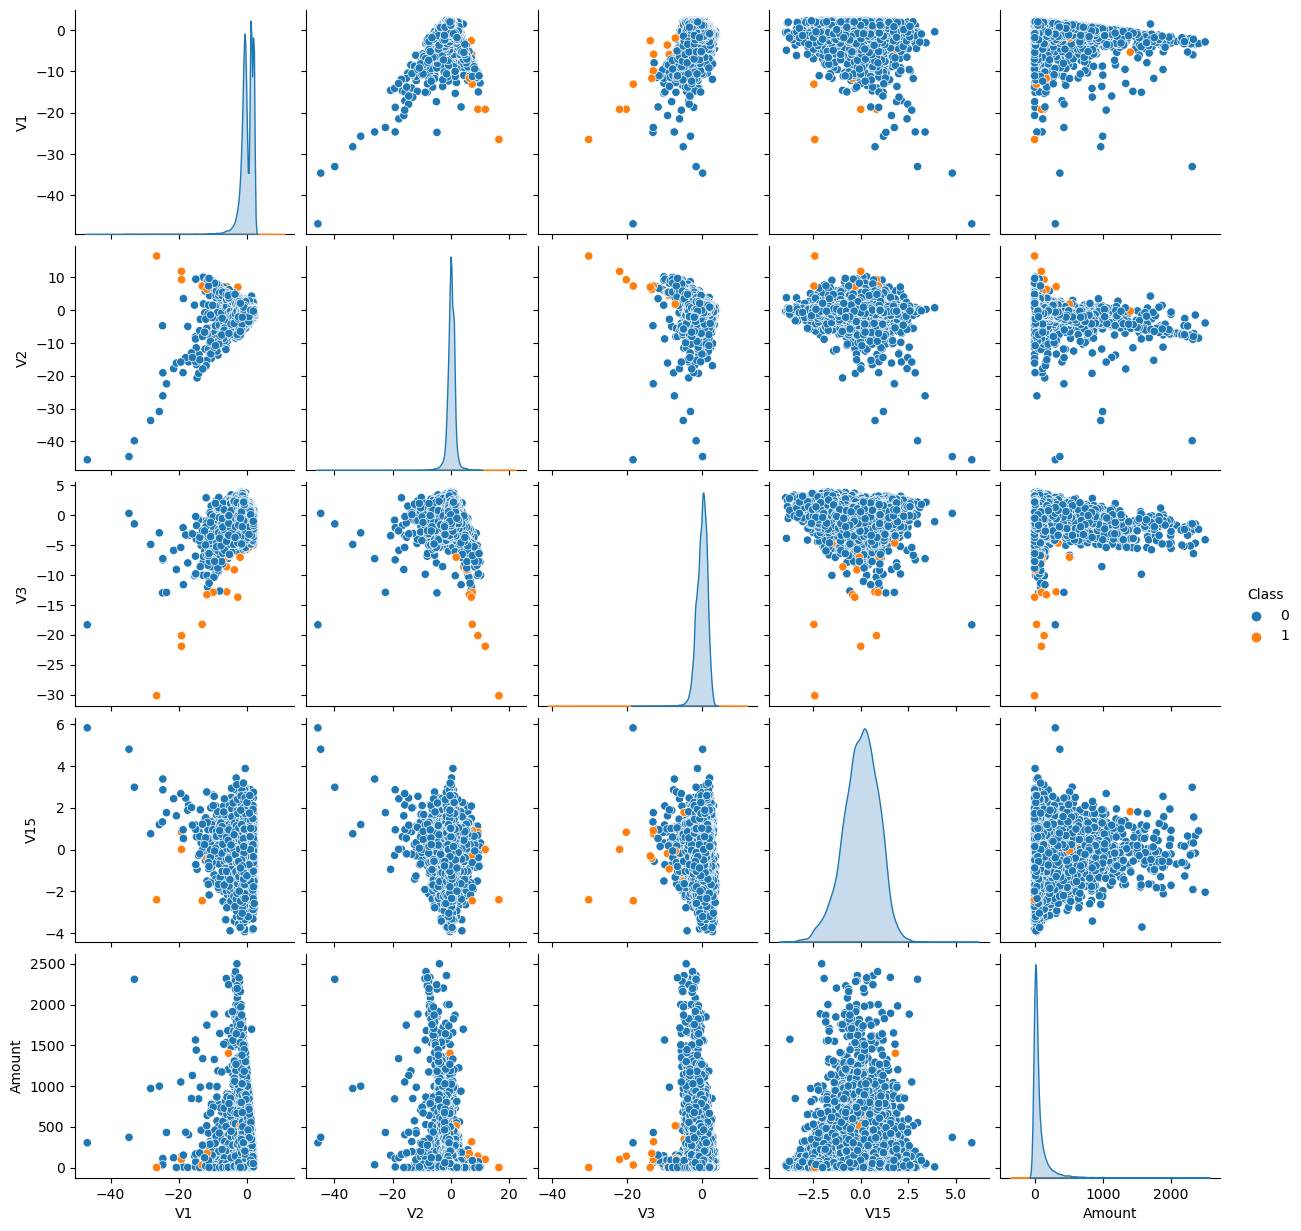

In [43]:
sns.pairplot(grouped_amountlow_df[col2].sample(frac = 0.1), hue = 'Class')
plt.show()

c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


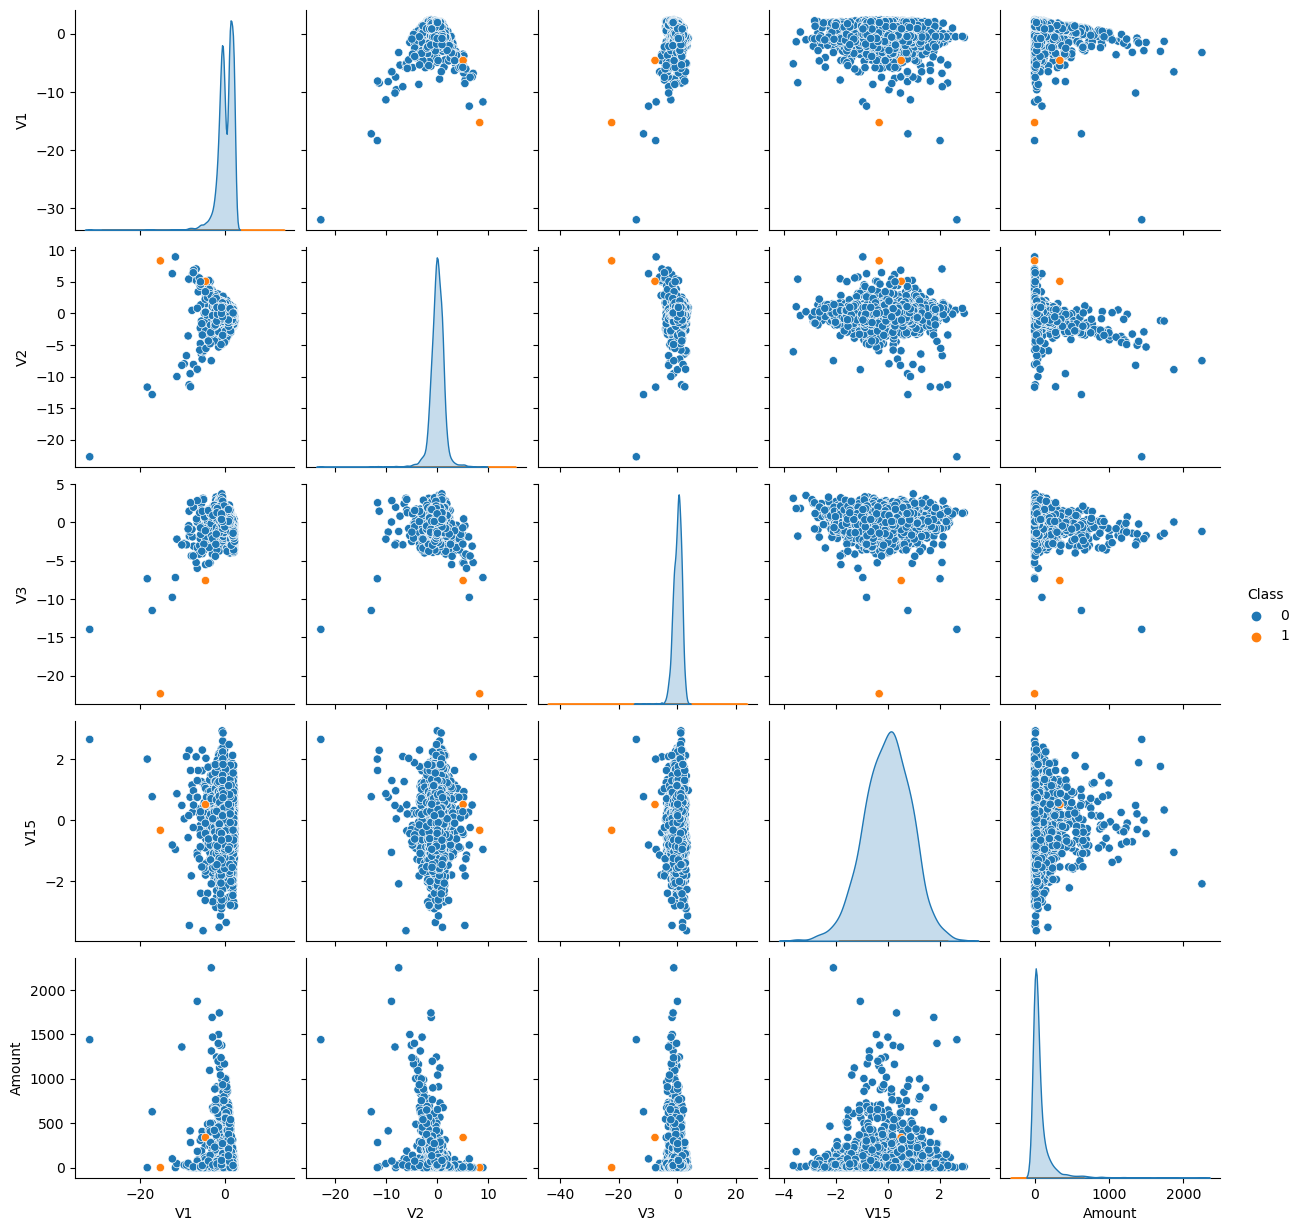

In [44]:
sns.pairplot(grouped_amountlow_df[col2].sample(frac = 0.01), hue = 'Class')
plt.show()

In [45]:
col3 = ['V10', 'V12', 'V20', 'V27','Amount',
       'Class']


c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


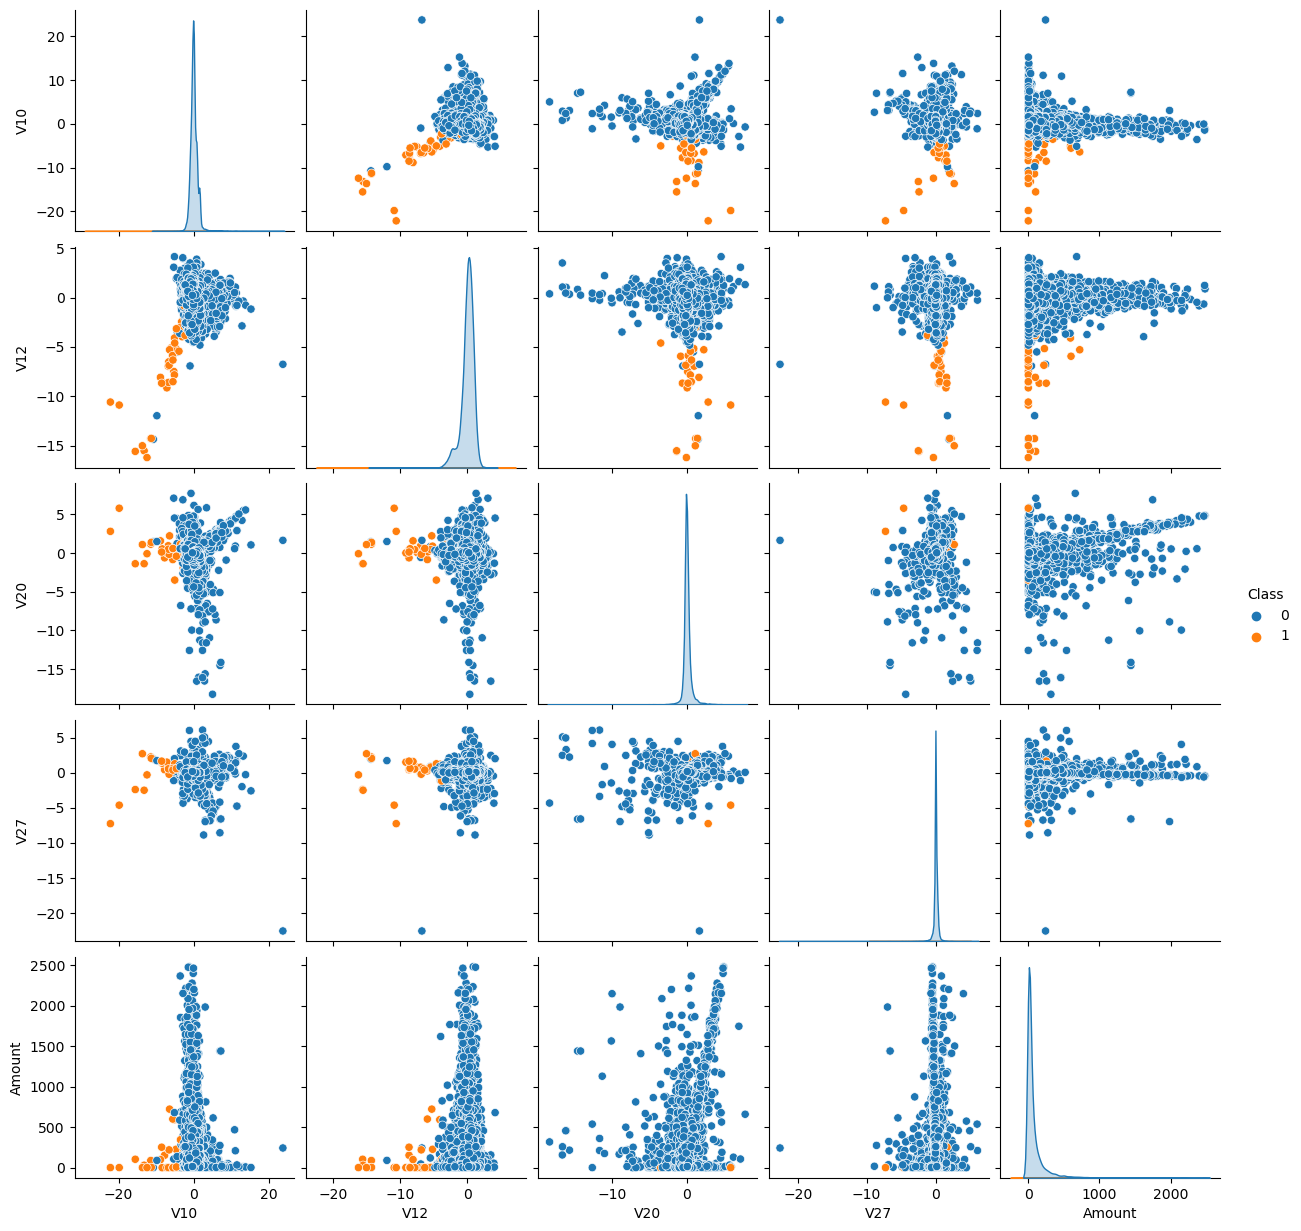

In [46]:
sns.pairplot(grouped_amountlow_df[col3].sample(frac = 0.1), hue = 'Class')
plt.show()

In [49]:
col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']


In [58]:
sns.pairplot(grouped_amountlow_df[col4].sample(frac = 0.1), hue = 'Class')
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


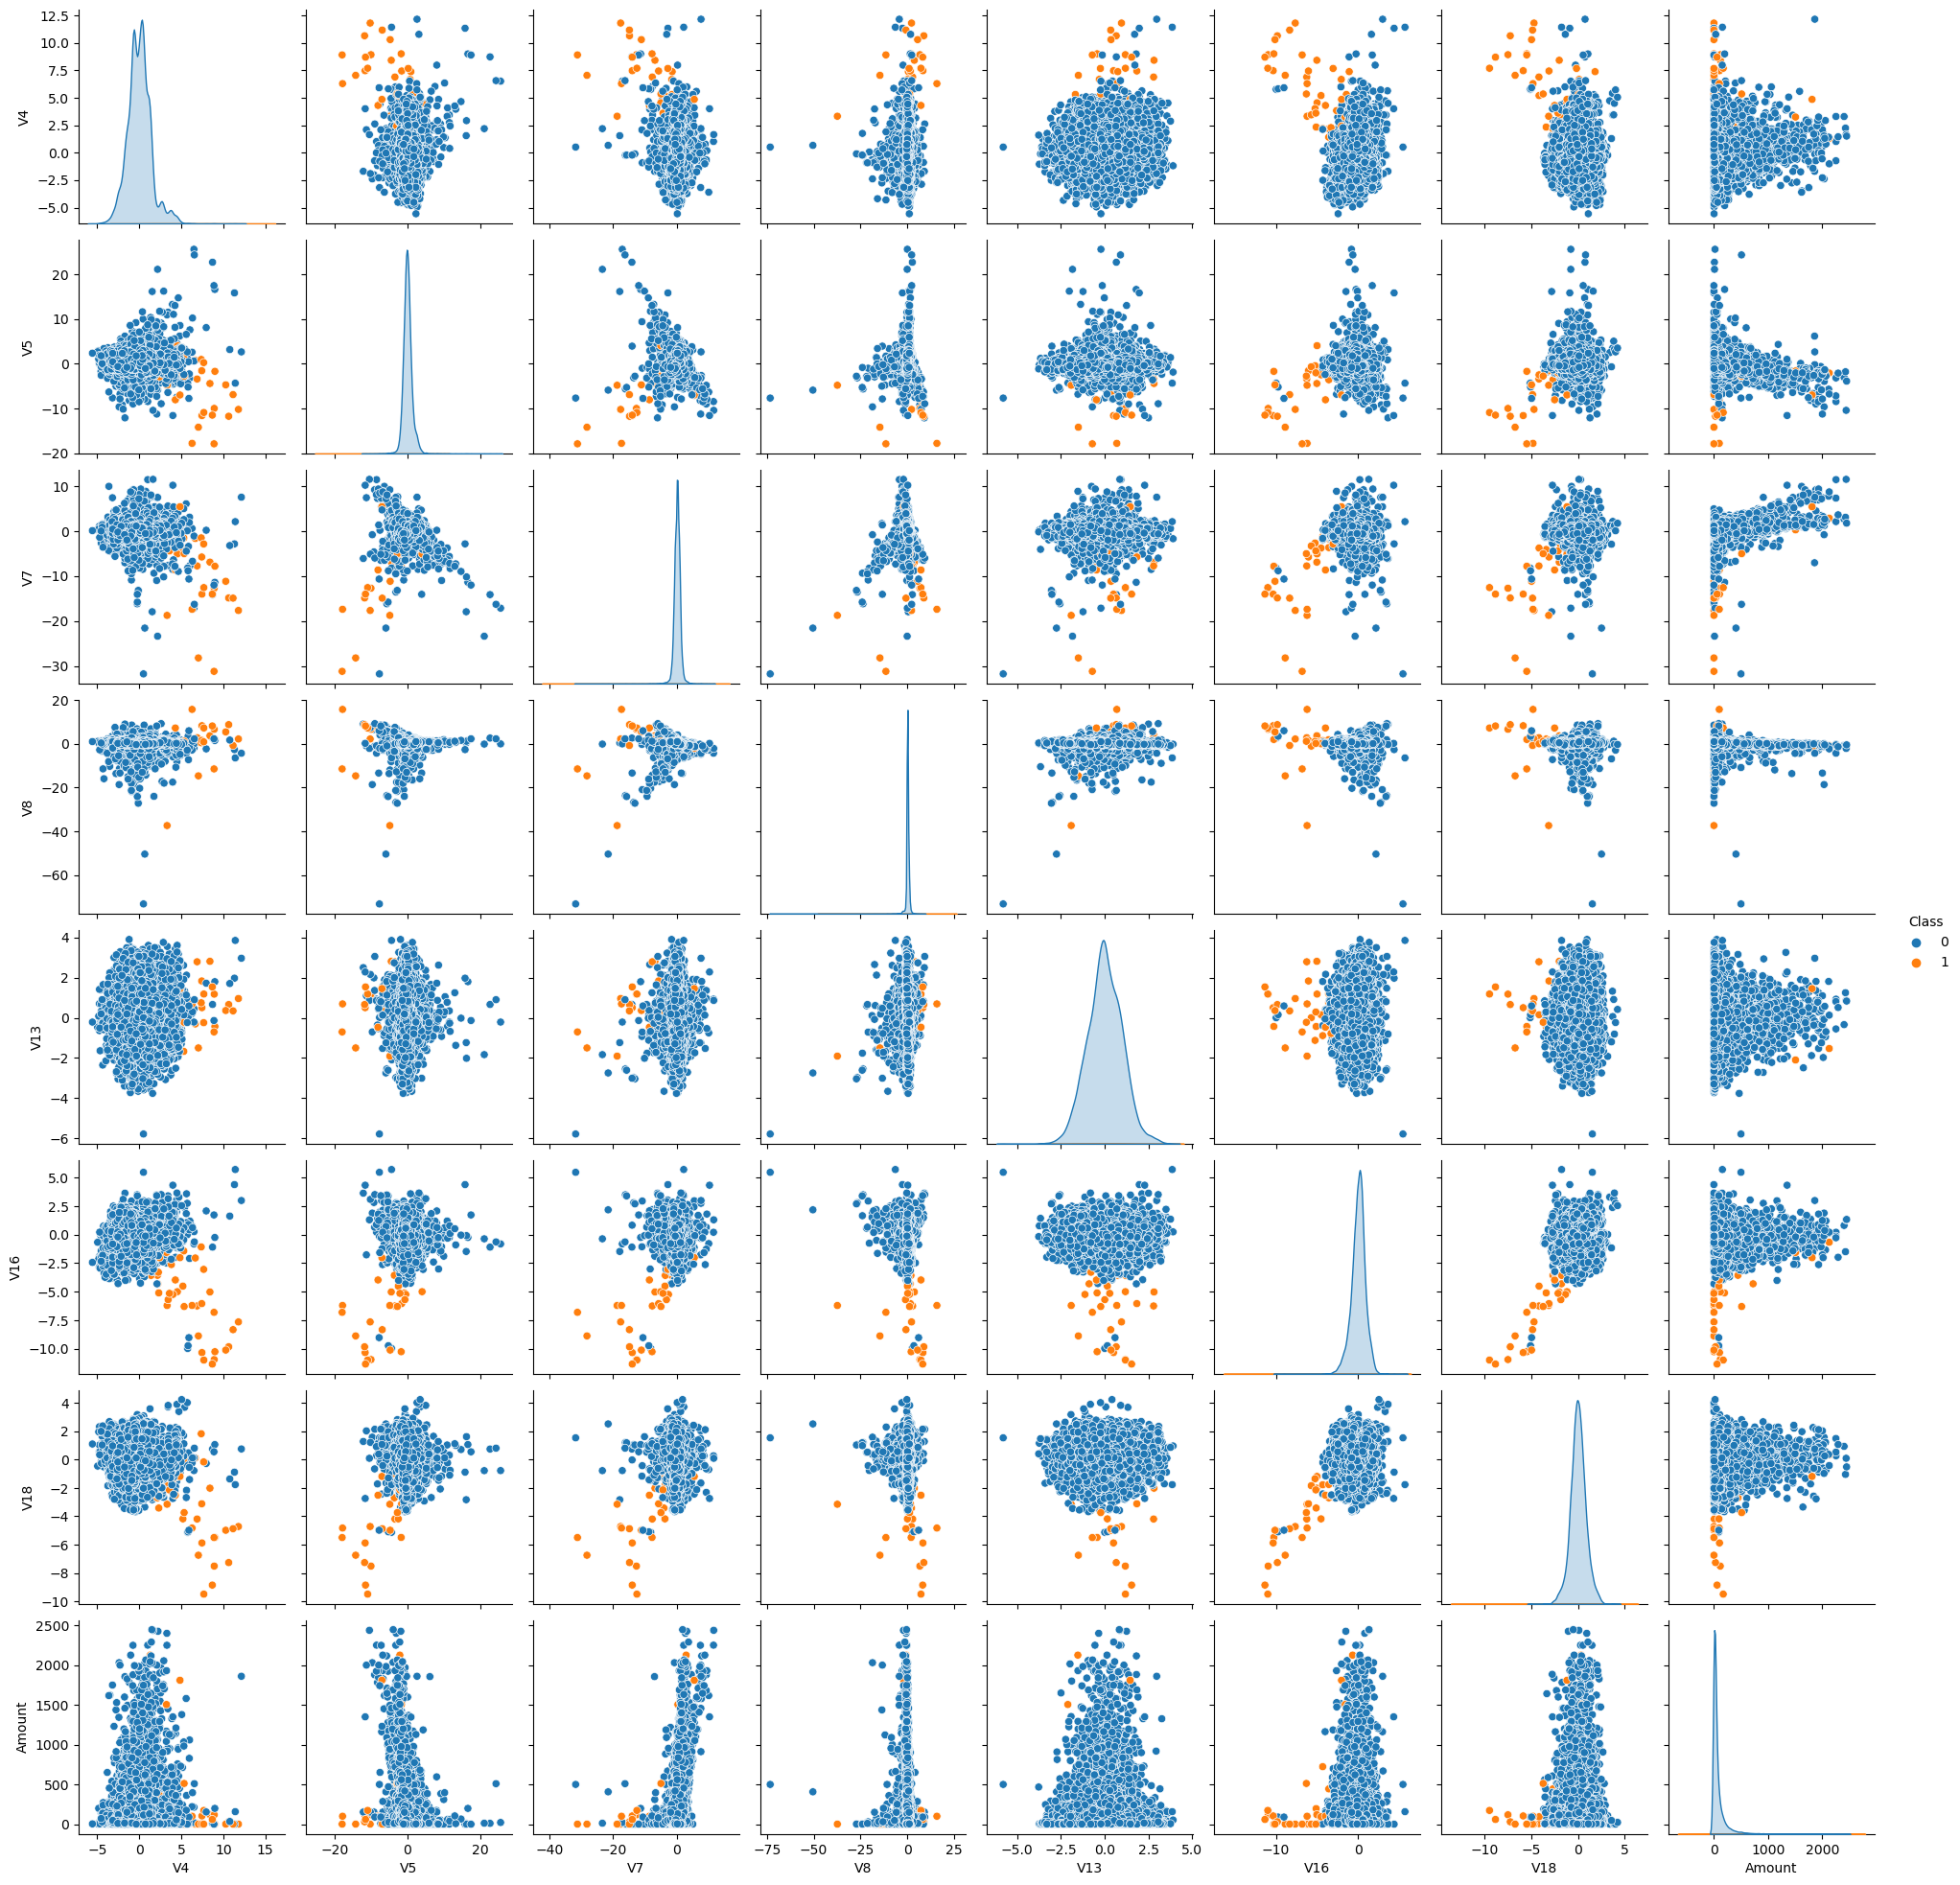

In [59]:
sns.pairplot(grouped_amountlow_df[col5].sample(frac = 0.1), hue = 'Class')
plt.show()

c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


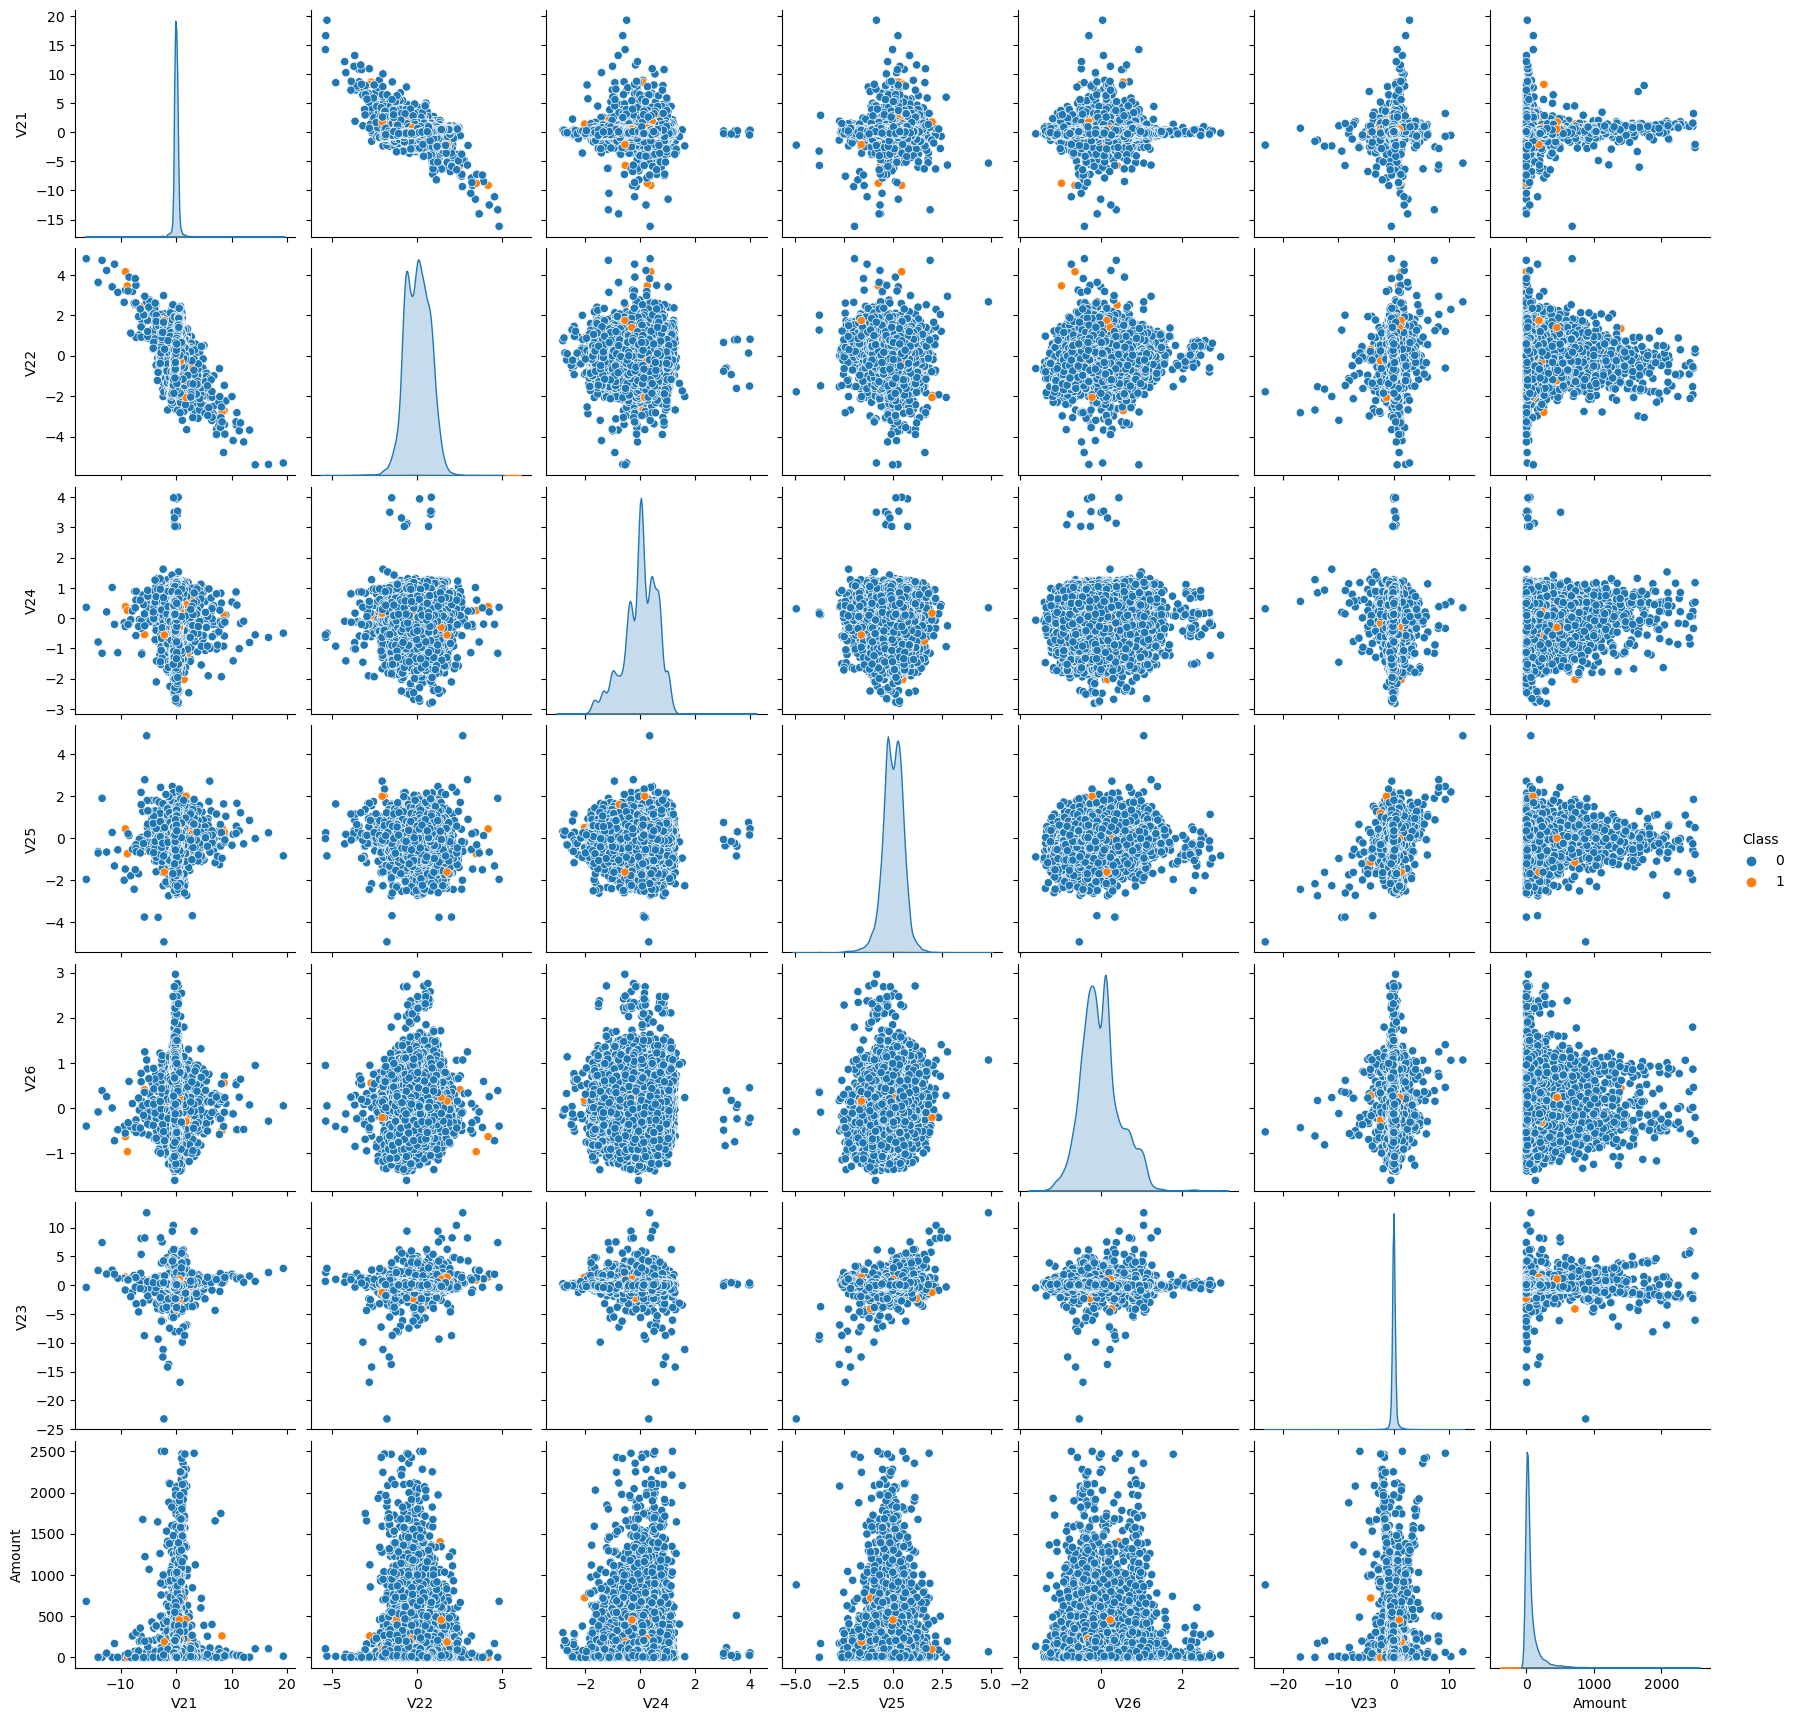

In [ ]:
sns.pairplot(grouped_amountlow_df[col6].sample(frac = 0.1), hue = 'Class')
plt.show()

In [54]:
col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

In [55]:
col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']

In [56]:
col5 = ['V4', 'V5', 'V7', 'V8','V13','V16','V18', 'Amount',
       'Class']

In [57]:
col6 = ['V21', 'V22', 'V24', 'V25','V26','V23', 'Amount',
       'Class']

*two group*

In [ ]:
grouped_amount_class_df = creditcard_df.groupby(['Amount_Group', 'Class'])

In [ ]:
grouped_amount_class_df.size()

Amount_Group  Class
0-2500        0        283875
              1           492
2500-above    0           440
dtype: int64

In [ ]:
grouped_amount_class_df.sample(3)

Time         V1         V2         V3        V4         V5  \
75060    55882.0  -2.277373   0.131146  -0.187536 -0.483634   0.099051   
91311    63409.0  -1.254872   0.369632   1.076047 -1.791734  -0.541348   
99504    67149.0   1.358043  -1.099869   0.297847 -1.273929  -1.466247   
87354    61646.0  -1.522305   1.505152   0.372364  2.286869  -0.526519   
143334   85285.0  -7.030308   3.421991  -9.525072  5.270891  -4.024630   
8617     11635.0   0.919137   4.199633  -7.535607  7.426940   1.118215   
49406    44045.0  -9.471686 -18.793329  -7.859680  2.904124  -3.906569   
230515  146361.0 -14.209824  -9.069390 -14.802073  0.958954 -16.896169   
93165    64276.0  -4.691261 -10.696782  -2.142371  2.327306  -4.887797   

              V6         V7        V8        V9       V10       V11       V12  \
75060  -1.139967   0.218643  0.770668 -0.792287 -0.694479  0.536998  0.691863   
91311  -1.042052  -0.021470  0.401372 -1.761956  0.157170  1.221028 -0.091460   
99504  -1.027835  -0.629799 -0.352559 -2.089235  1.366691 -0.265422 -0.300941   
87354   0.998593  -1.087556 -0.027248 -0.533001  0.169573  2.790396 -2.316952   
143334 -2.865682  -6.989195  3.791551 -4.622730 -8.409665  6.309044 -8.576761   
8617   -2.886722  -1.341036  0.363933 -2.203224 -4.137840  4.570113 -7.629170   
49406   5.203612   6.672270 -0.770031 -1.563443 -1.999149 -0.177839 -0.409788   
230515  8.853557  15.732000 -1.629529 -0.327754  0.217044  1.120463 -0.020136   
93165   0.620638   3.056642 -0.777991 -0.298607 -1.022535 -0.711472  0.471799   

             V13        V14       V15       V16        V17       V18  \
75060  -0.235156   1.111008 -0.401954  0.698889  -0.515612  0.323645   
91311  -0.309099   0.361471 -0.587093  1.599270   0.000770 -1.296303   
99504   1.515792  -0.430994  0.414693 -0.469043   0.480052 -0.332587   
87354  -0.782532  -3.431738 -0.527702 -3.293558  -3.901499 -2.525440   
143334  0.246747 -11.534046 -0.364265 -5.452495 -11.887570 -3.563585   
8617    1.733917  -9.440375 -0.023353 -1.233958   1.632009  1.315735   
49406   1.007723   1.216872  0.664338  1.596521   0.287740 -0.062115   
230515  1.320800   1.206385  0.466678  3.452882   0.434858 -2.784474   
93165   0.722651   0.019886 -0.129050 -1.271302   0.593538  1.239673   

             V19        V20       V21       V22       V23       V24       V25  \
75060  -0.013914  -0.200130  0.114741  0.116327  0.355908  0.046007 -0.093117   
91311   0.492028   0.063782 -0.201835 -0.980890 -0.083103  0.275075  0.297302   
99504  -0.181459  -0.089777 -0.287556 -0.606988  0.022670  0.380512  0.309240   
87354   0.795144   0.412801  0.332216  0.493981 -0.080198 -0.253327 -0.477800   
143334  0.876019   0.545698  1.103398 -0.541855  0.036943 -0.355519  0.353634   
8617   -0.287189   0.535435  0.316094  0.055179  0.210692 -0.417918 -0.911188   
49406  -0.623989  11.717431  3.532745 -2.803880 -5.197310  1.347381 -1.132031   
230515 -0.973412  -6.374833 -2.293635  1.227471 -7.315744 -0.542643 -1.612062   
93165  -1.477344   5.807103  1.303095 -2.565585 -2.526882  0.896164 -1.153065   

             V26       V27       V28   Amount  Class Amount_Group  
75060   0.417448  0.114880 -0.349430    23.00      0       0-2500  
91311  -0.734658 -0.025433 -0.120333    33.80      0       0-2500  
99504  -0.351789  0.015222  0.038787    99.90      0       0-2500  
87354   0.991740 -0.952554 -0.390364    19.04      1       0-2500  
143334  1.042458  1.359516 -0.272188     0.00      1       0-2500  
8617    0.466524  0.627393  0.157851     1.00      1       0-2500  
49406  -0.654617 -1.077898  0.984347  5680.00      0   2500-above  
230515 -0.010015  3.934383  0.752342  3362.00      0   2500-above  
93165   0.561959 -0.590585  0.562512  3106.44      0   2500-above

In [ ]:
grouped_amountlow_class1_df = grouped_amount_class_df.get_group(('0-2500', 1))

In [ ]:
grouped_amountlow_class1_df.describe()

Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9         V10  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123   -5.676883   
std      5.372468    1.858124    7.206773    6.797831    2.500896    4.897341   
min    -22.105532   -6.406267  -43.557242  -41.044261  -13.434066  -24.588262   
25%     -4.792835   -2.501511   -7.965295   -0.195336   -3.872383   -7.756698   
50%     -1.522962   -1.424616   -3.034402    0.621508   -2.208768   -4.578825   
75%      0.214562   -0.413216   -0.945954    1.764879   -0.787850   -2.614184   
max     11.095089    6.474115    5.802537   20.007208    3.353525    4.031435   

              V11         V12         V13         V14         V15         V16  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean     3.800173   -6.259393   -0.109334   -6.971723   -0.092929   -4.139946   
std      2.678605    4.654458    1.104518    4.278940    1.049915    3.865035   
min     -1.702228  -18.683715   -3.127795  -19.214325   -4.498945  -14.129855   
25%      1.973397   -8.688177   -0.979117   -9.692723   -0.643539   -6.562915   
50%      3.586218   -5.502530   -0.065566   -6.729720   -0.057227   -3.549795   
75%      5.307078   -2.974088    0.672964   -4.282821    0.609189   -1.226043   
max     12.018913    1.375941    2.815440    3.442422    2.471358    3.139656   

              V17         V18         V19         V20         V21         V22  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -6.665836   -2.246308    0.680659    0.372319    0.713588    0.014049   
std      6.970618    2.899366    1.539853    1.346635    3.869304    1.494602   
min    -25.162799   -9.498746   -3.681904   -4.128186  -22.797604   -8.887017   
25%    -11.945057   -4.664576   -0.299423   -0.171760    0.041787   -0.533764   
50%     -5.302949   -1.664346    0.646807    0.284693    0.592146    0.048434   
75%     -1.341940    0.091772    1.649318    0.822445    1.244611    0.617474   
max      6.739384    3.790316    5.228342   11.059004   27.202839    8.361985   

              V23         V24         V25         V26         V27         V28  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -0.040308   -0.105130    0.041449    0.051648    0.170575    0.075667   
std      1.579642    0.515577    0.797205    0.471679    1.376766    0.547291   
min    -19.254328   -2.028024   -4.781606   -1.152671   -7.263482   -1.869290   
25%     -0.342175   -0.436809   -0.314348   -0.259416   -0.020025   -0.108868   
50%     -0.073135   -0.060795    0.088371    0.004321    0.394926    0.146344   
75%      0.308378    0.285328    0.456515    0.396733    0.826029    0.381152   
max      5.466230    1.091435    2.208209    2.745261    3.052358    1.779364   

            Amount  Class  
count   492.000000  492.0  
mean    122.211321    1.0  
std     256.683288    0.0  
min       0.000000    1.0  
25%       1.000000    1.0  
50%       9.250000    1.0  
75%     105.890000    1.0  
max    2125.870000    1.0

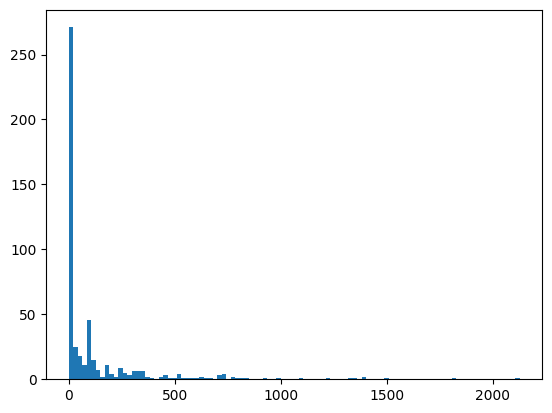

In [ ]:
plt.hist(grouped_amountlow_class1_df['Amount'], bins=100)
plt.show()

We can observe that fruad transaction via credit cards occurs at very low range of amount around 100 dollars

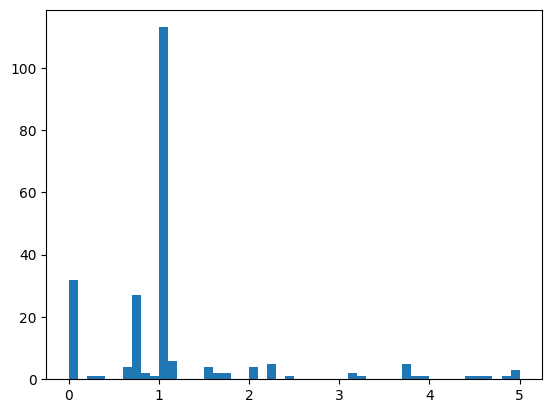

In [ ]:
plt.hist(grouped_amountlow_class1_df['Amount'], range=(0,5), bins=50)
plt.show()

For fruadlent transaction mode of amount =1 dollar

In [ ]:
grouped_amountlow_class0_df = grouped_amount_class_df.get_group(('0-2500', 0))

In [ ]:
grouped_amountlow_class0_df.describe()

Time             V1             V2             V3  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean    94842.693002       0.019252       0.011278       0.020141   
std     47486.591102       1.896891       1.543058       1.438756   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     54237.500000      -0.913512      -0.595753      -0.878702   
50%     84715.000000       0.023871       0.065687       0.184441   
75%    139340.000000       1.316972       0.801707       1.029929   
max    172792.000000       2.454930      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.012053       0.017056      -0.003995      -0.003225   
std         1.392545       1.279867       1.299465       1.076977   
min        -5.683171     -23.669726     -26.160506     -31.764946   
25%        -0.851194      -0.686058      -0.767394      -0.552336   
50%        -0.024309      -0.052033      -0.274552       0.039884   
75%         0.733815       0.613252       0.395629       0.568357   
max        16.491217      34.801666      16.614054      21.014587   

                  V8             V9            V10            V11  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.002065       0.005339       0.012705      -0.006953   
std         1.153434       1.088449       1.040267       1.002772   
min       -73.216718      -6.290730     -14.741096      -4.797473   
25%        -0.207385      -0.639440      -0.530921      -0.763604   
50%         0.022636      -0.049409      -0.090828      -0.035154   
75%         0.326947       0.598685       0.456700       0.735867   
max        18.709255      15.594995      23.745136      10.002190   

                 V12            V13            V14            V15  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.011214      -0.000310       0.011228      -0.000451   
std         0.945446       0.994830       0.896178       0.914423   
min       -15.144988      -5.791881     -18.392091      -4.391307   
25%        -0.401400      -0.648514      -0.422857      -0.583170   
50%         0.141938      -0.013859       0.051350       0.047831   
75%         0.619288       0.661984       0.492874       0.648318   
max         7.848392       4.569009      10.526766       5.825654   

                 V16            V17            V18            V19  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.006018       0.011570       0.003407       0.000122   
std         0.842411       0.749273       0.823714       0.810010   
min       -10.115560     -17.098444      -5.366660      -4.932733   
25%        -0.465782      -0.482640      -0.497319      -0.454861   
50%         0.066979      -0.064971      -0.002997       0.003967   
75%         0.522904       0.399787       0.500424       0.457997   
max         6.442798       9.253526       4.295648       5.591971   

                 V20            V21            V22            V23  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.007283      -0.003176       0.001888       0.002227   
std         0.684865       0.707172       0.719780       0.555094   
min       -23.646890     -34.830382      -8.593642     -36.666000   
25%        -0.211797      -0.228572      -0.541013      -0.161164   
50%        -0.062898      -0.030150       0.007580      -0.010958   
75%         0.131507       0.184764       0.528964       0.147489   
max        16.756448      22.614889      10.503090      22.083545   

                 V24            V25            V26            V27  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.000027       0.000876       0.000179      -0.000799   
std         0.605311       0.516503       0.481869       0.387242   
min     

In [ ]:
grouped_amountlow_class0_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
247431  153575.0  0.053289  0.835676 -0.197939 -0.523296  1.361629 -1.184514   
69623    53506.0 -0.202089  1.322589  0.402890  0.789767  0.267389 -0.362254   
81321    58888.0  0.510513 -0.998359 -0.231597  1.362832 -0.375572 -0.082306   
189790  128560.0 -0.395837  1.004180  1.308883  0.449209  0.779213  1.188312   
6871      8770.0 -0.430140  0.871692  1.645752  0.315423 -0.054142 -0.218981   

              V7        V8        V9       V10       V11       V12       V13  \
247431  1.699219 -0.802922 -0.069262 -0.531540 -0.083313  0.135702  0.516378   
69623   0.400755  0.241960 -0.830744 -0.395570 -1.173997  0.482737  1.520020   
81321   0.595822 -0.203295  0.256213 -0.296840 -1.277097  0.311241  0.471877   
189790  0.264757  0.380886 -0.407021 -0.068619  0.089761  0.761944  0.978035   
6871    0.506343  0.031565  1.007109 -0.648299  1.899249 -1.464653  1.782491   

             V14       V15       V16       V17       V18       V19       V20  \
247431 -1.488339 -0.505714 -0.152568  0.352531 -0.388224 -0.390375  0.043773   
69623   0.319582  0.899270  0.033596 -0.417036  0.232038  0.651517 -0.047627   
81321   0.093814  0.296970  0.123644 -0.505086 -0.145830  0.116597  0.698853   
189790 -0.109948  0.087621  0.271975 -0.883049  0.780022  1.137638  0.252037   
6871    1.348479 -1.891824 -0.222353  0.501936  0.179142  0.399703  0.114104   

             V21       V22       V23       V24       V25       V26       V27  \
247431 -0.140370 -0.011556  0.115383  1.084686 -1.241269 -0.018184 -0.265045   
69623   0.128844  0.372893 -0.193985 -0.421908  0.017524 -0.279336 -0.033631   
81321  -0.021891 -0.817657 -0.436118 -0.436191  0.510328 -0.504649 -0.044123   
189790 -0.149754 -0.244756 -0.161543 -0.246504 -0.173036 -0.728611  0.443869   
6871   -0.288047 -0.383001 -0.059913  0.295416  0.030885  0.185514  0.209596   

             V28  Amount  Class Amount_Group  
247431 -0.135892   27.48      0       0-2500  
69623  -0.024661    1.50      0       0-2500  
81321   0.086552  400.34      0       0-2500  
189790  0.210917    5.00      0       0-2500  
6871    0.064533   29.81      0       0-2500

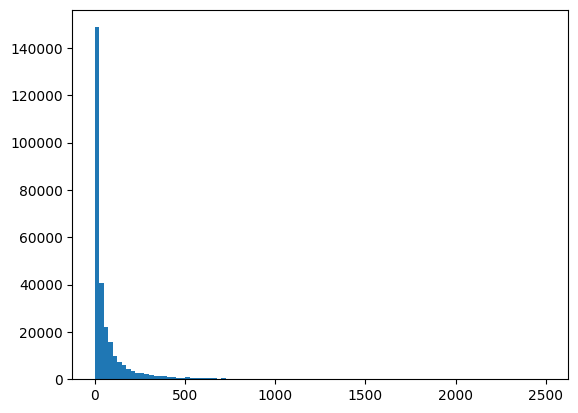

In [ ]:
plt.hist(grouped_amountlow_class0_df['Amount'], bins=100)
plt.show()

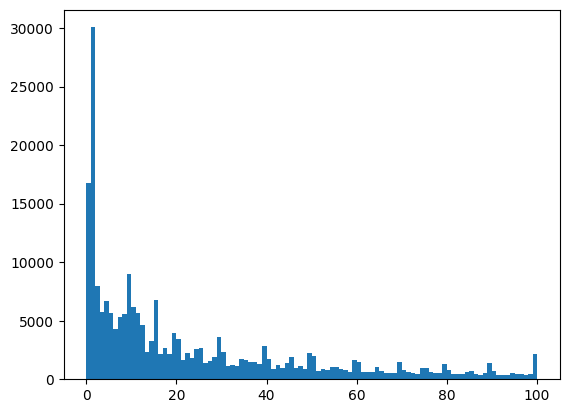

In [ ]:
plt.hist(grouped_amountlow_class0_df['Amount'],range =(0,100),  bins=100)
plt.show()

Time
NF


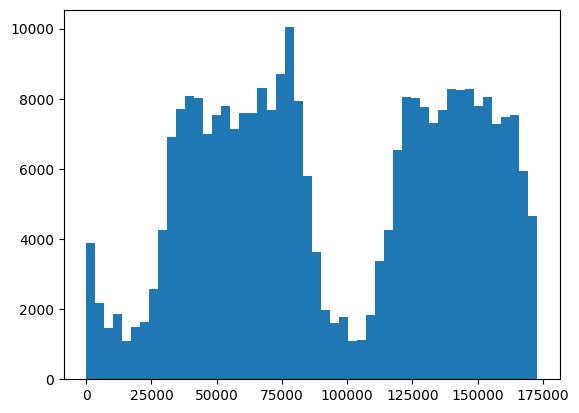

F


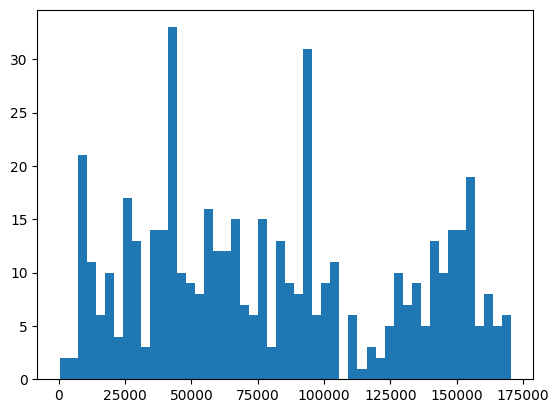

V1
NF


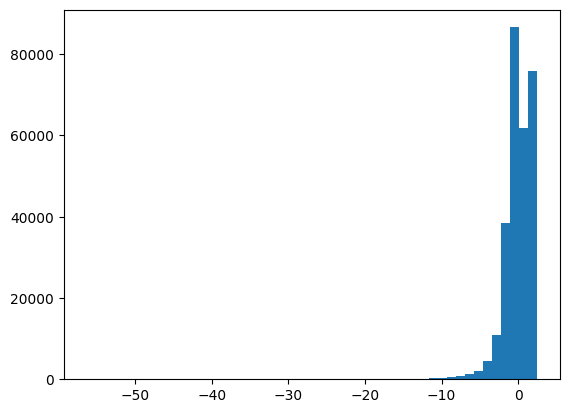

F


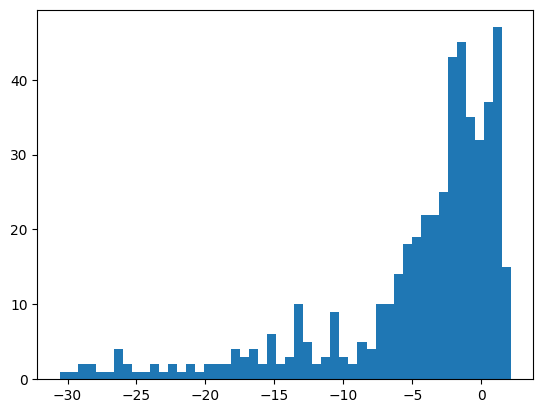

V2
NF


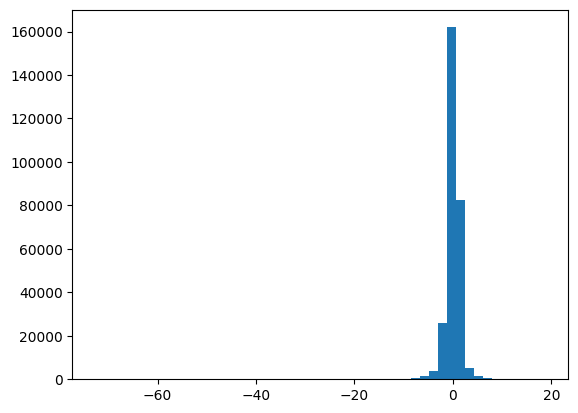

F


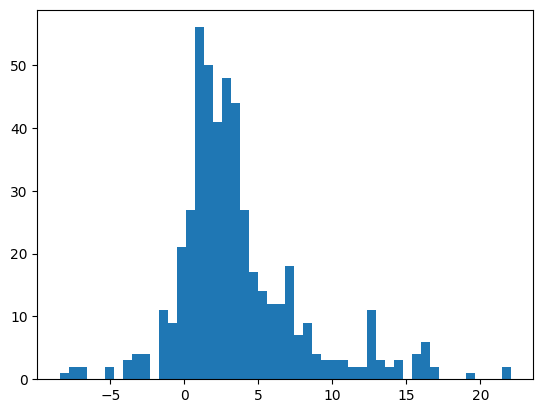

V3
NF


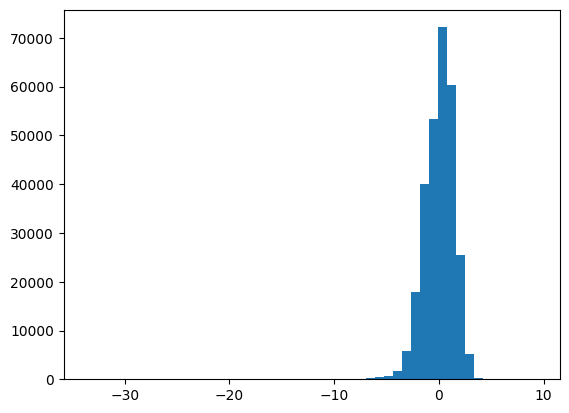

F


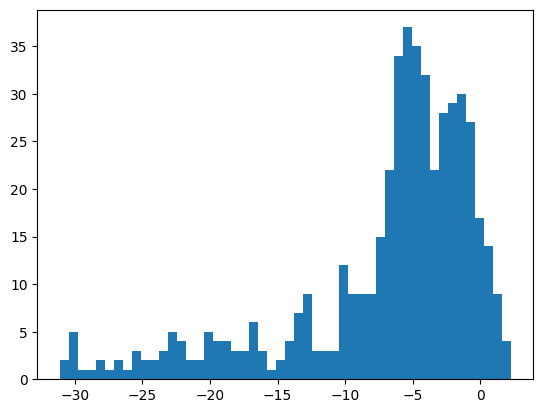

V4
NF


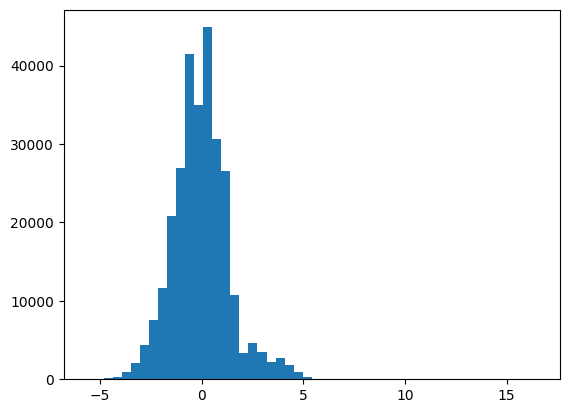

F


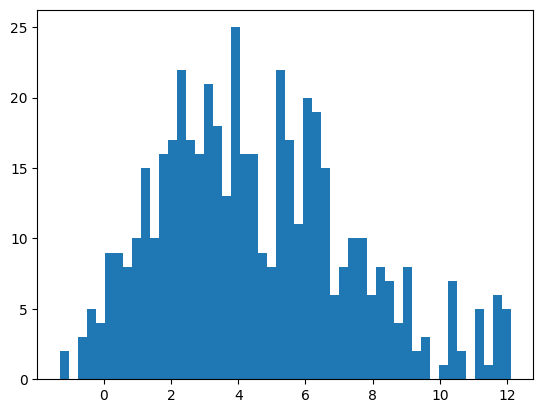

V5
NF


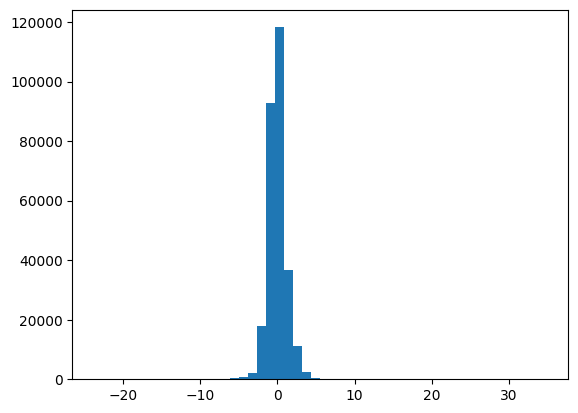

F


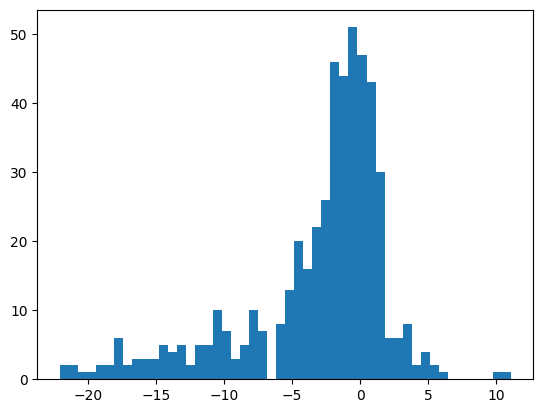

V6
NF


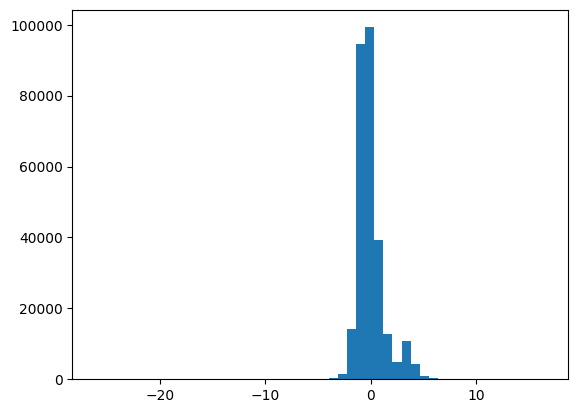

F


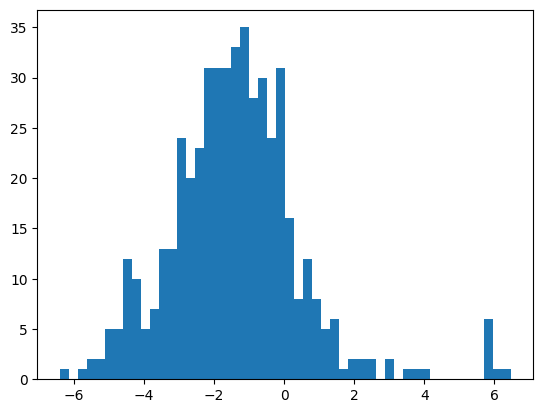

V7
NF


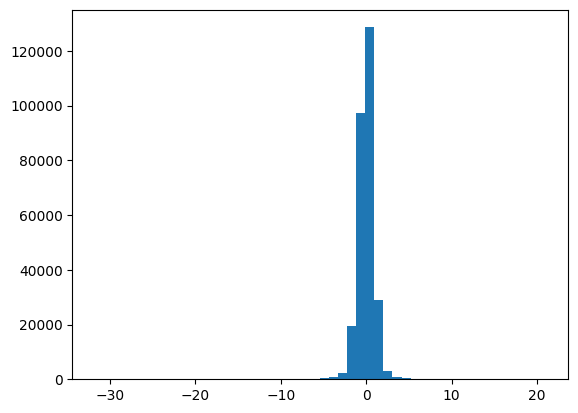

F


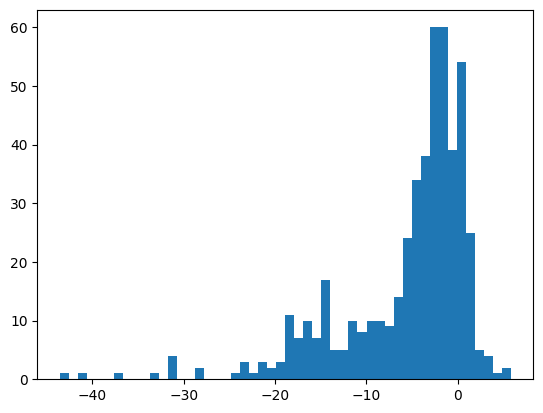

V8
NF


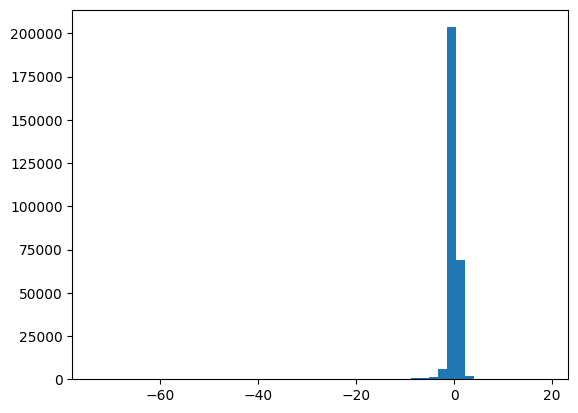

F


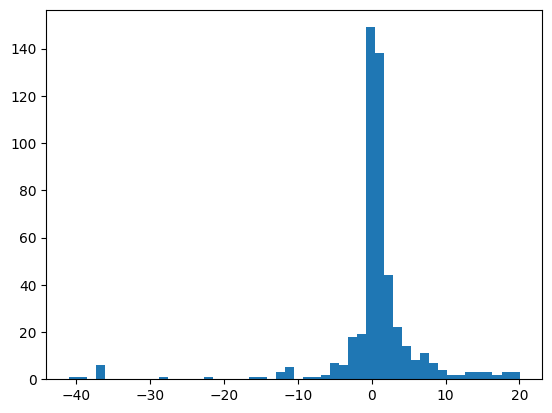

V9
NF


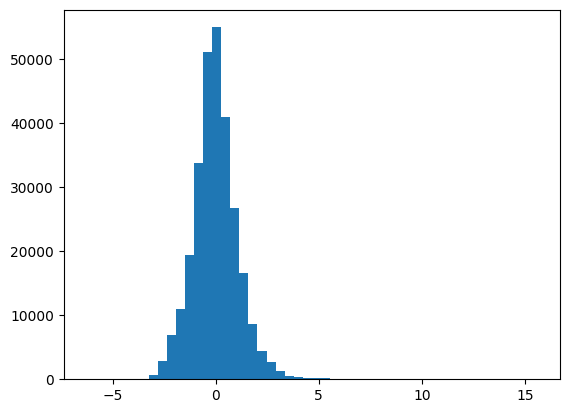

F


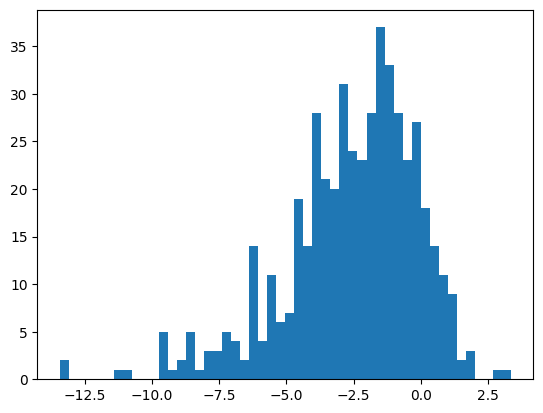

V10
NF


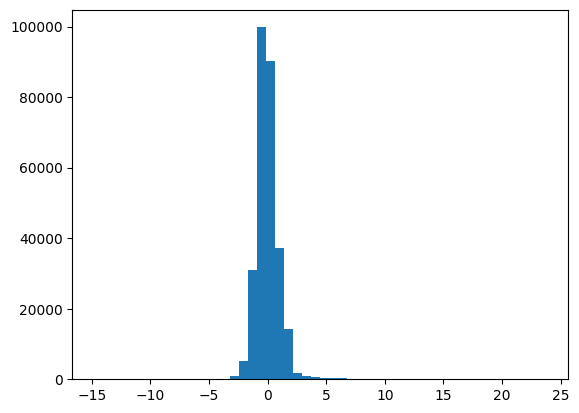

F


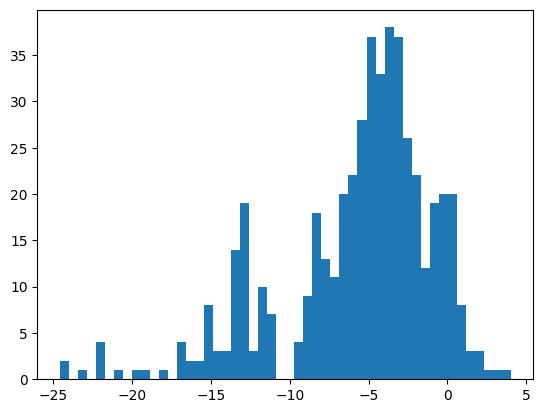

V11
NF


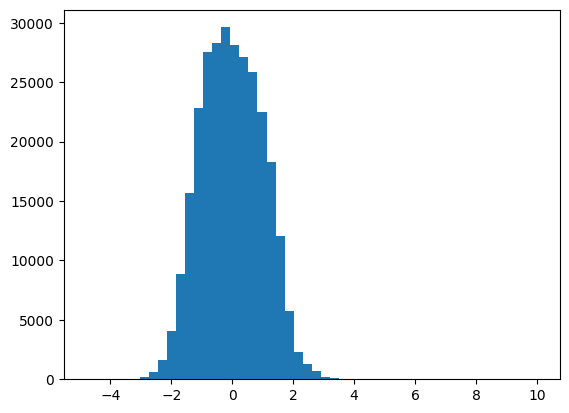

F


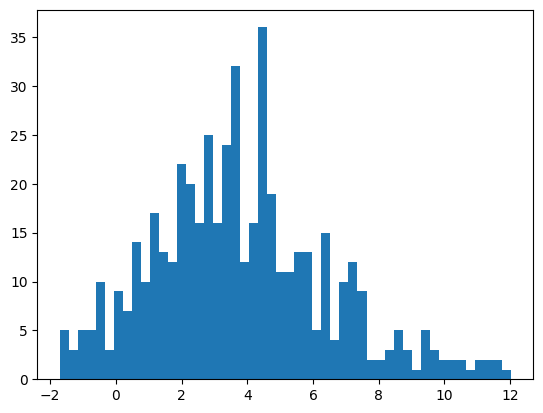

V12
NF


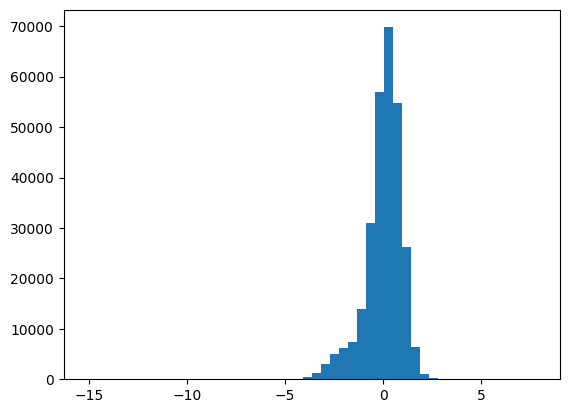

F


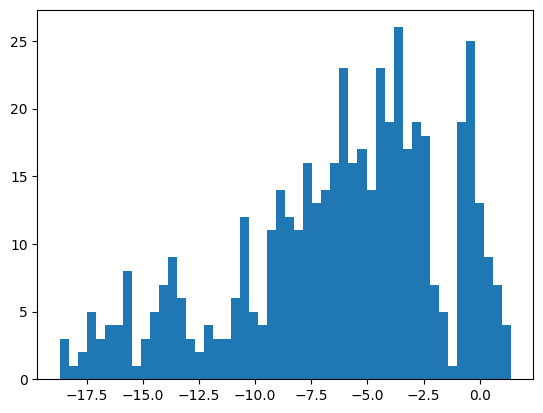

V13
NF


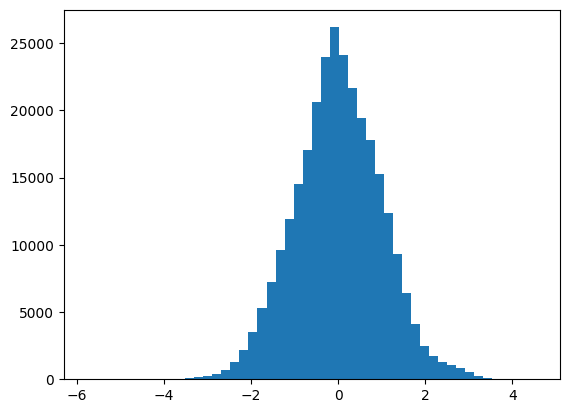

F


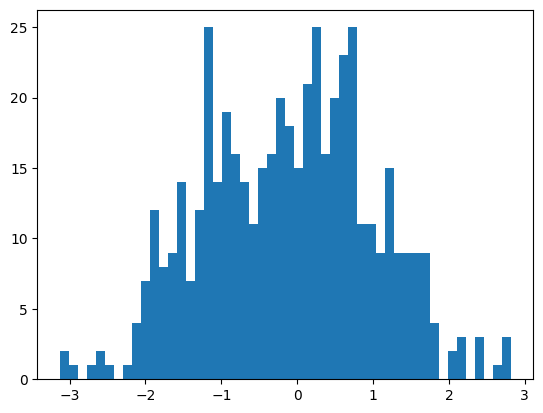

V14
NF


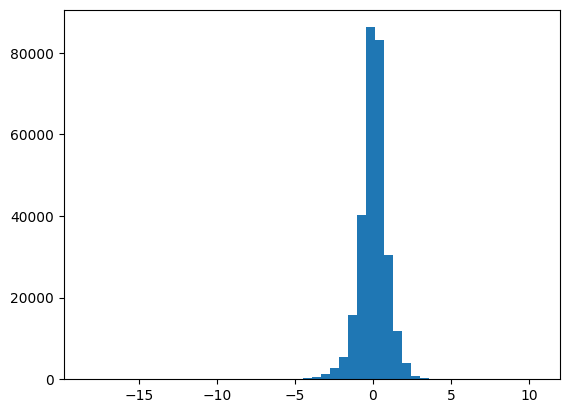

F


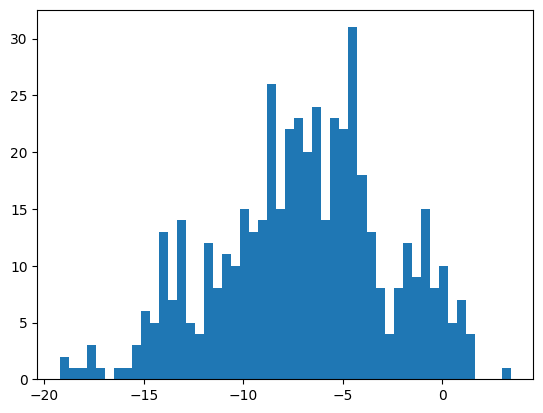

V15
NF


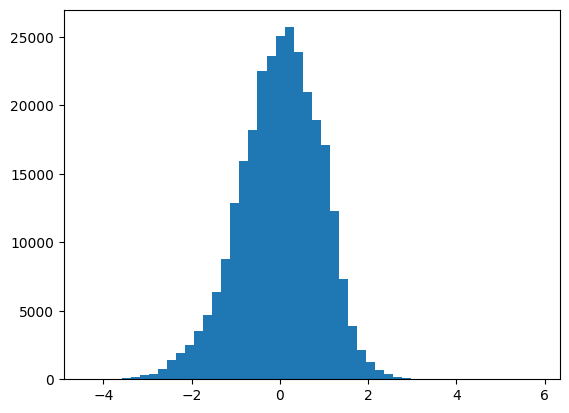

F


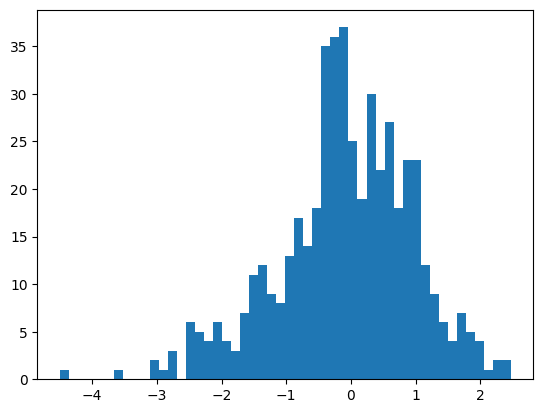

V16
NF


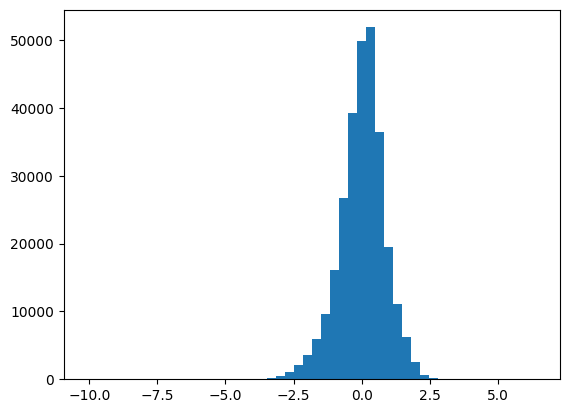

F


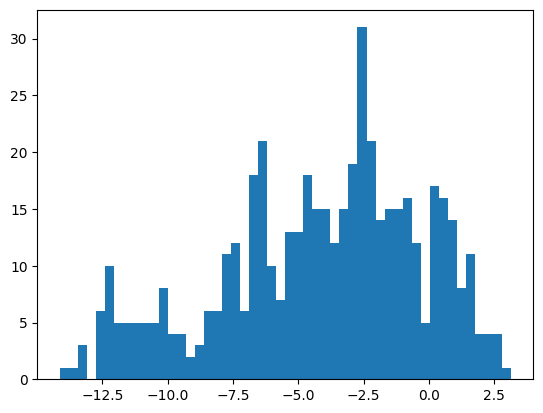

V17
NF


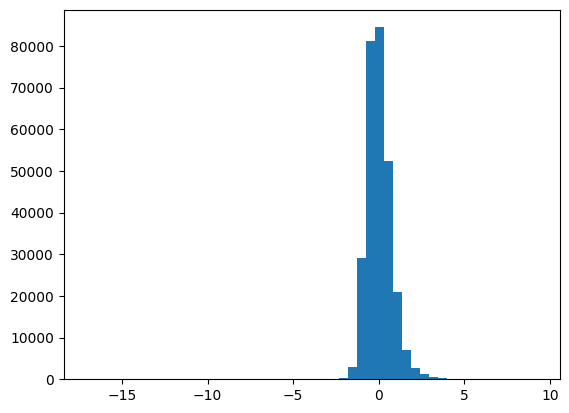

F


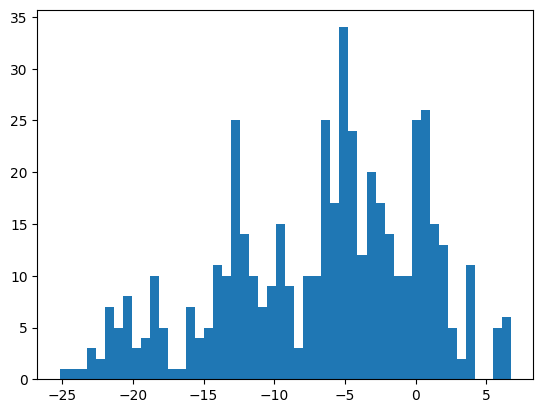

V18
NF


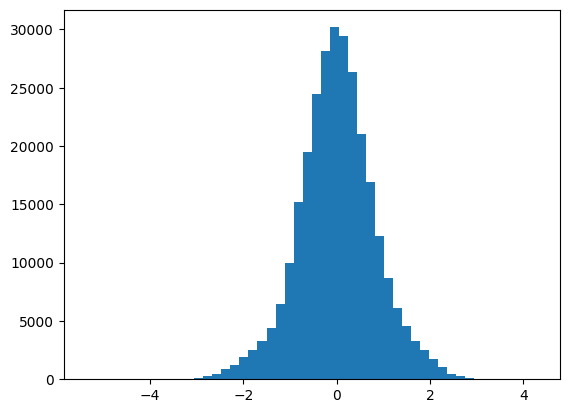

F


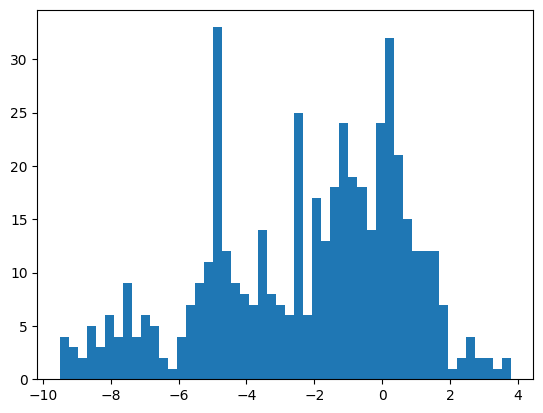

V19
NF


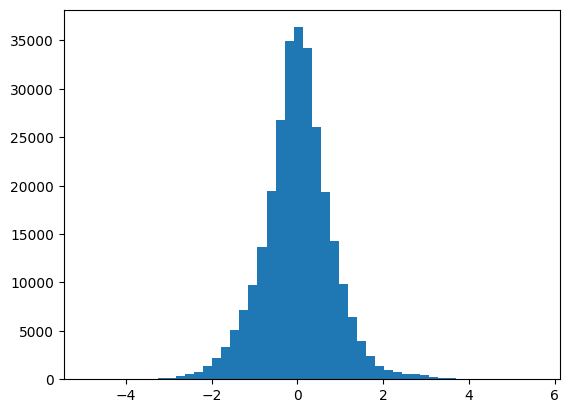

F


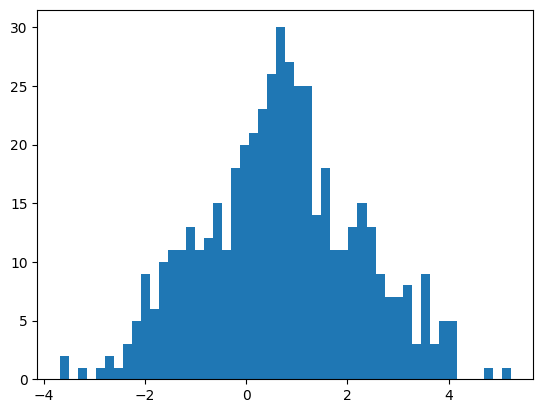

V20
NF


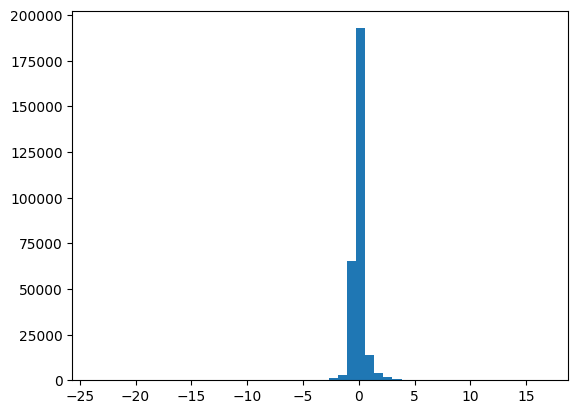

F


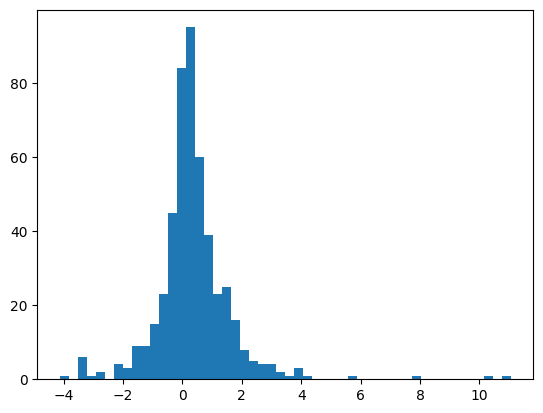

V21
NF


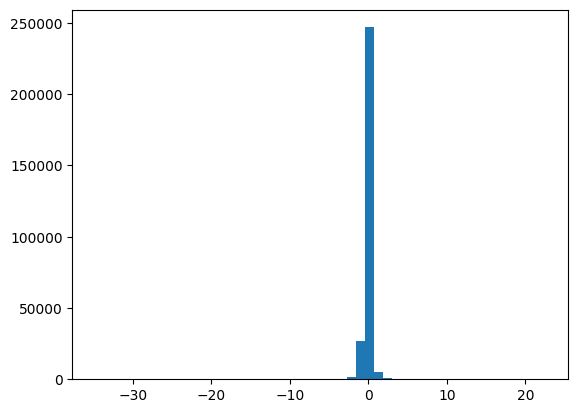

F


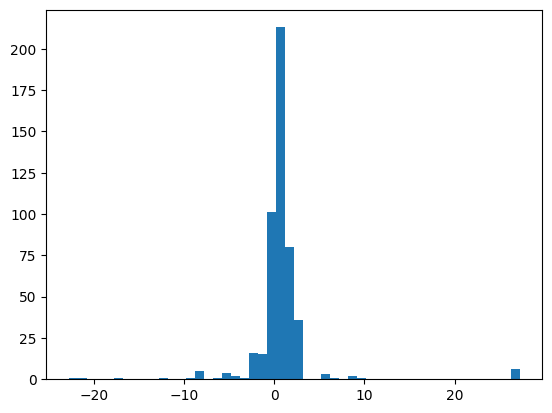

V22
NF


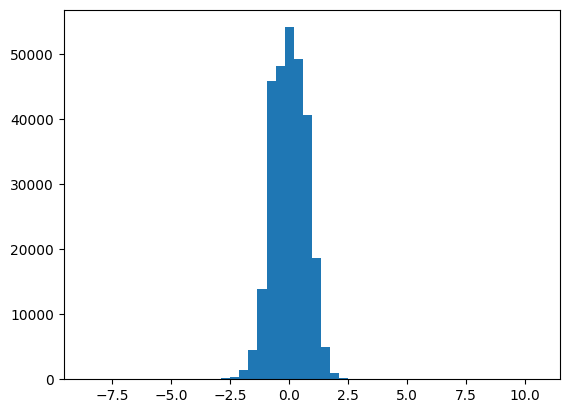

F


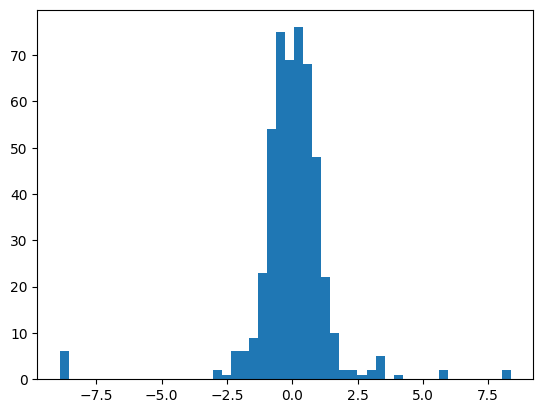

V23
NF


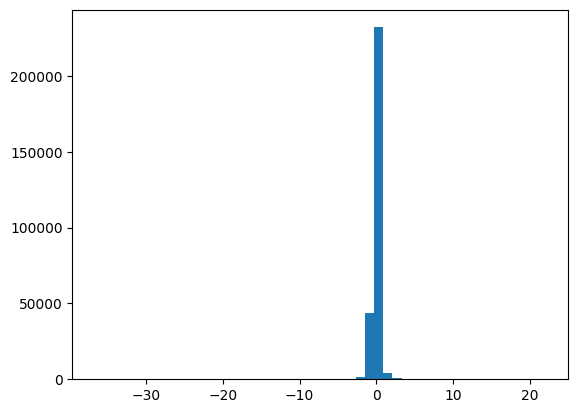

F


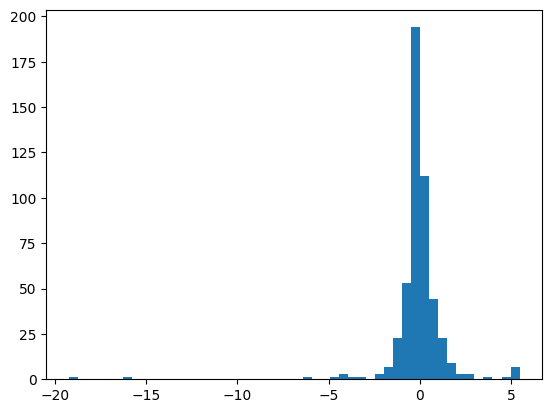

V24
NF


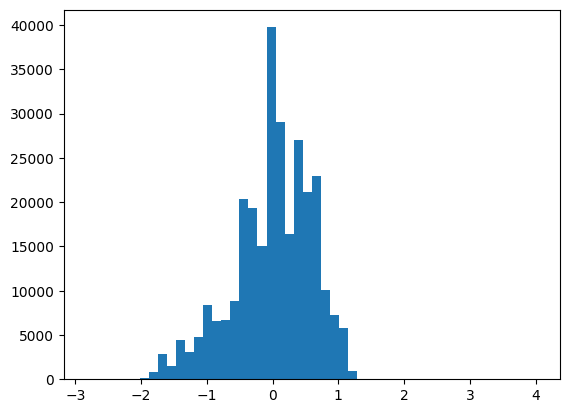

F


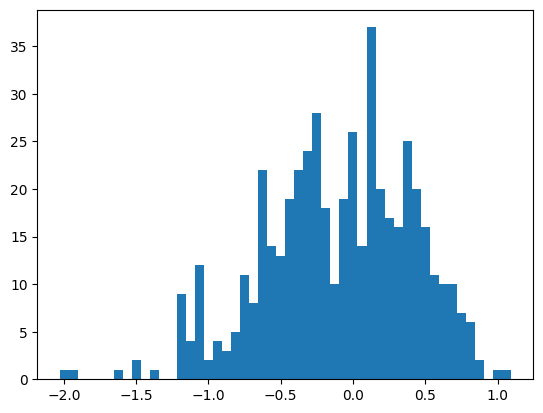

V25
NF


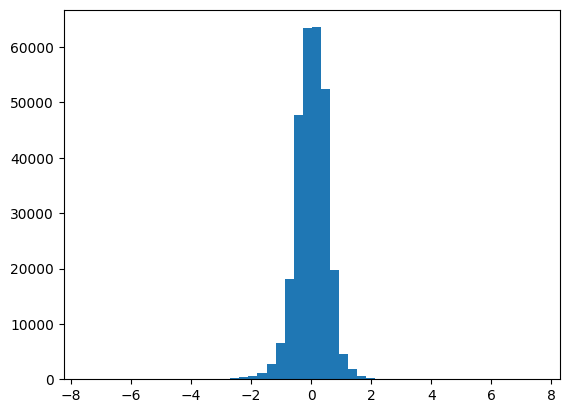

F


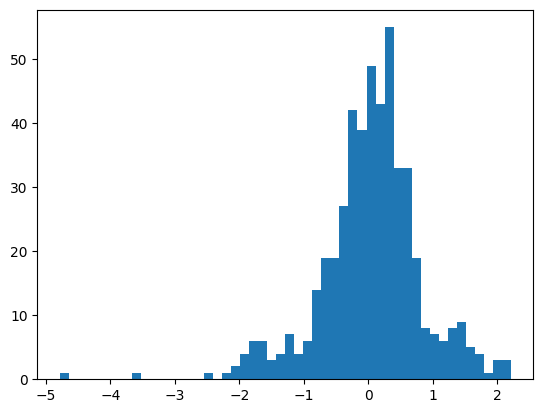

V26
NF


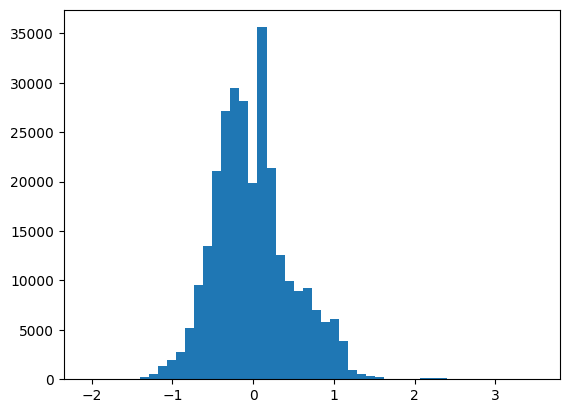

F


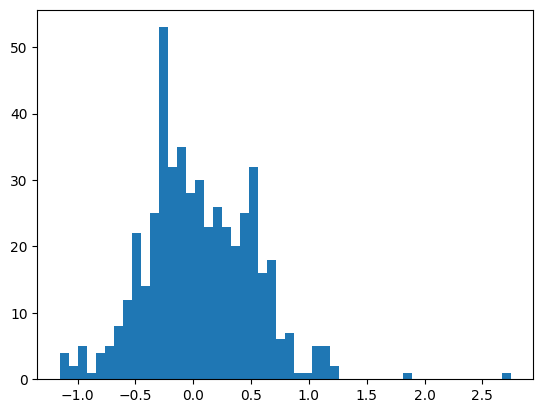

V27
NF


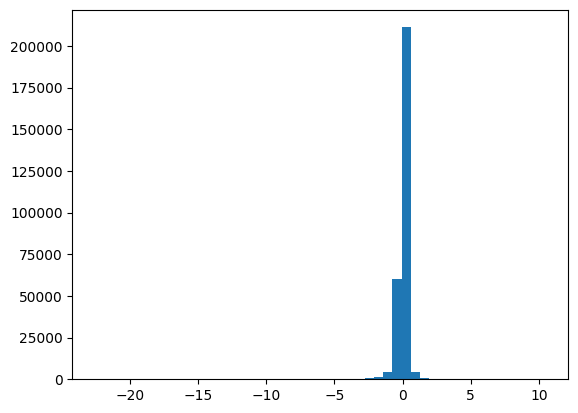

F


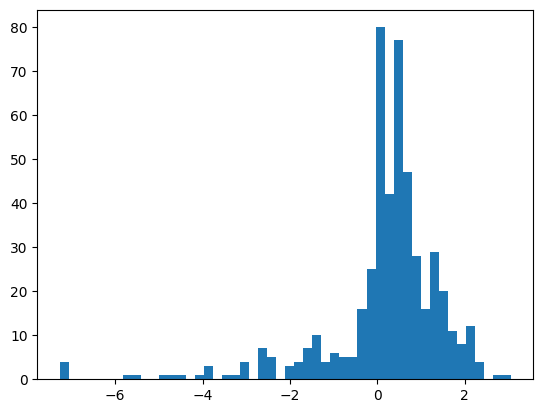

V28
NF


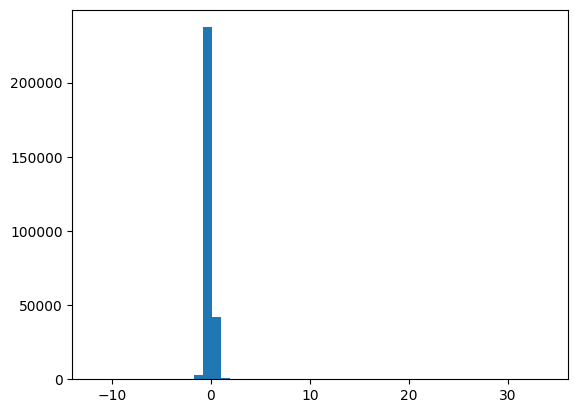

F


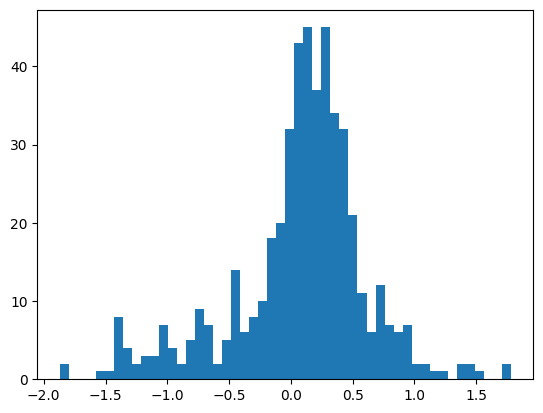

Amount
NF


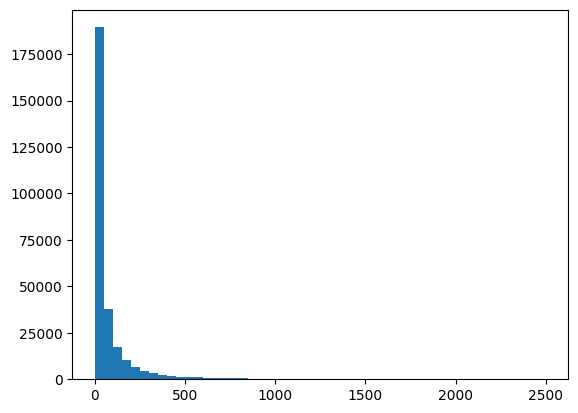

F


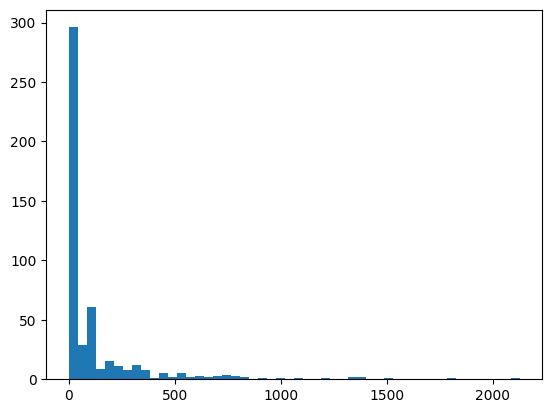

Class
NF


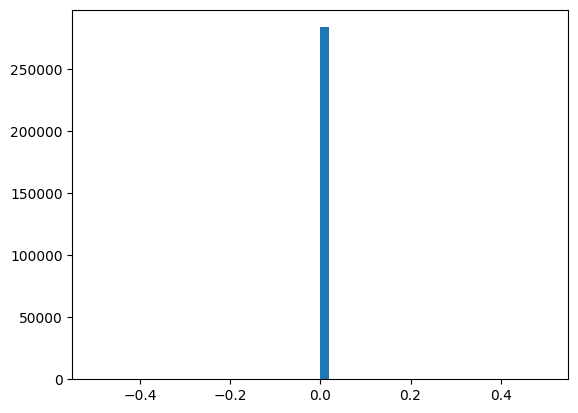

F


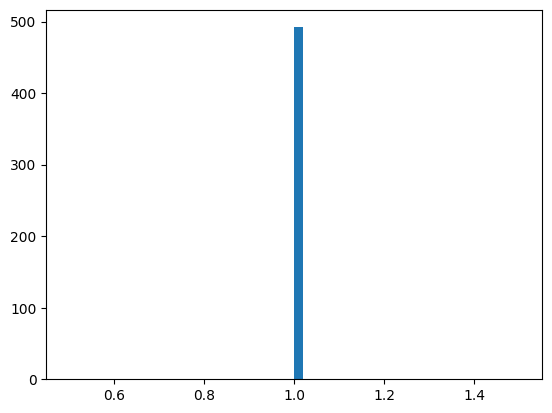

In [ ]:
for x in col1:
    print(x)
    print('NF')
    plt.hist(grouped_amountlow_class0_df[x], bins=50)
    plt.show()
    print('F')
    plt.hist(grouped_amountlow_class1_df[x], bins=50)
    plt.show()

# Feature Selection

In [ ]:
selected_col = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V27', 'V28', 'Amount',
       'Class']

In [ ]:
X_col = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V27', 'V28', 'Amount']

In [ ]:
grouped_amountlow_df[selected_col].head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V27  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412  0.133558   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.008983   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980 -0.055353   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038  0.062723   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542  0.219422   

        V28  Amount  Class  
0 -0.021053  149.62      0  
1  0.014724    2.69      0  
2 -0.059752  378.66      0  
3  0.061458  123.50      0  
4  0.215153   69.99      0

In [ ]:
fin_df = grouped_amountlow_df[selected_col]

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25)


In [ ]:
for train_index, test_index in sss.split(fin_df, fin_df['Class']):
    train_df = fin_df.iloc[train_index]
    test_df = fin_df.iloc[test_index]

In [ ]:
test_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
199517  133001.0 -0.003227  1.412486  0.769719  3.894248  1.922563  2.753763   
230039  146160.0  1.977867  0.575927 -2.163206  1.568178  0.909059 -1.142284   
176478  122786.0  2.223713 -0.513113 -2.052462 -0.877007 -0.068028 -1.747818   
81875    59139.0  1.194527 -0.647045  0.957209  0.565699 -0.845956  0.877839   
198486  132510.0  1.605585 -0.784335 -1.155434  1.549753 -0.464163 -0.669404   

              V7        V8        V9       V10       V11       V12       V13  \
199517  0.603558  0.460625 -2.143806  1.906280  1.008317  0.124403  0.171107   
230039  0.772365 -0.423249 -0.067660 -0.400673 -0.031925  0.716578  0.745585   
176478  0.320346 -0.637944 -1.023958  0.906279 -0.483204 -0.469097  0.328222   
81875  -0.975823  0.216537 -0.296249  0.572488 -1.406270  0.472002  1.413593   
198486  0.116154 -0.162826  0.904727  0.206757 -1.374322 -0.700946 -1.744649   

             V14       V15       V16       V17       V18       V19       V20  \
199517  0.359596  0.519491 -1.037357  0.594665 -1.141250  0.666059  0.308560   
230039 -1.187924 -0.469562 -0.384133  1.073761 -0.218170 -0.581136 -0.139246   
176478  0.328042 -0.056572  0.359514  0.399136 -1.833035  0.571560  0.000336   
81875  -0.734073  0.218610 -1.455137 -0.095077  1.024069 -1.107071 -0.400836   
198486  0.571533  0.368259 -0.067124 -0.360756  0.383146 -0.703137  0.020235   

             V27       V28  Amount  Class  
199517  0.353313  0.039648    5.76      0  
230039  0.003820 -0.013651   21.74      0  
176478 -0.077968 -0.077072   34.90      0  
81875   0.112597  0.040781   51.00      0  
198486 -0.021816 -0.019562  207.00      0

In [ ]:
train_df['Class'].describe()

count    213275.000000
mean          0.001730
std           0.041559
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [ ]:
test_df['Class'].describe()

count    71092.000000
mean         0.001730
std          0.041559
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

*Smote*

In [ ]:
X_train_df = train_df[X_col]
y_train_df = train_df['Class']

In [ ]:
X_test_df = test_df[X_col]
y_test_df = test_df['Class']

In [ ]:
y_train_df.describe()

count    213275.000000
mean          0.001730
std           0.041559
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [ ]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_df, y_train_df)


In [ ]:
X_train_smote.describe()

Time             V1             V2             V3  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean    86658.920065      -2.539620       1.952998      -3.723905   
std     48403.915174       5.338866       3.544860       6.073399   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     43588.465521      -3.365642      -0.077702      -5.382964   
50%     78796.635912      -0.870546       1.041395      -1.650608   
75%    133702.826473       0.762918       3.055296       0.245751   
max    172792.000000       2.451888      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean        2.392649      -1.690508      -0.738745      -3.020198   
std         3.213330       4.045661       1.708170       5.629341   
min        -5.683171     -23.669726     -26.160506     -43.557242   
25%        -0.046423      -1.981945      -1.644907      -3.478111   
50%         1.511237      -0.496314      -0.699692      -0.796975   
75%         4.536508       0.386488       0.023101       0.171255   
max        16.491217      34.801666      16.614054      21.014587   

                  V8             V9            V10            V11  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean        0.281161      -1.362321      -2.995376       2.025698   
std         4.854764       2.254380       4.437165       2.776591   
min       -73.216718     -13.320155     -24.588262      -4.797473   
25%        -0.199061      -2.343824      -4.766445      -0.106837   
50%         0.168245      -0.813646      -1.076162       1.237038   
75%         0.873646       0.071945      -0.047871       3.757561   
max        20.007208      15.594995      23.745136      12.018913   

                 V12            V13            V14            V15  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean       -3.368058      -0.021994      -3.670571      -0.051969   
std         4.665136       1.001549       4.650518       0.919585   
min       -18.683715      -5.791881     -19.214325      -4.498945   
25%        -5.836041      -0.714991      -7.041875      -0.567261   
50%        -1.292977      -0.013935      -1.379200      -0.026390   
75%         0.160367       0.645034       0.074377       0.578808   
max         7.848392       4.469566      10.526766       5.784514   

                 V16            V17            V18            V19  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean       -2.220945      -3.614635      -1.233234       0.363889   
std         3.448796       5.920881       2.373393       1.167324   
min       -14.129855     -25.162799      -9.498746      -4.932733   
25%        -3.697478      -5.751262      -1.992572      -0.364239   
50%        -0.808891      -0.676251      -0.454597       0.238069   
75%         0.200679       0.119456       0.270267       0.977731   
max         6.442798       7.893393       4.115560       4.851255   

                 V20            V27            V28         Amount  
count  425812.000000  425812.000000  425812.000000  425812.000000  
mean        0.166293       0.088163       0.031265      96.942561  
std         0.991711       0.903797       0.424666     188.282798  
min       -22.838548     -22.565679     -11.710896       0.000000  
25%        -0.192678      -0.069908      -0.059949       3.630000  
50%         0.039105       0.056109       0.033758      27.968799  
75%         0.436448       0.432147       0.202032      99.990000  
max        16.756448      10.507884      33.847808    2500.000000

In [ ]:
y_train_smote.describe()

count    425812.000000
mean          0.500000
std           0.500001
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: Class, dtype: float64

# Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_smote, y_train_smote)


In [ ]:
predictions = model.predict(X_test_df)
print(classification_report(y_test_df, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70969
           1       0.14      0.85      0.25       123

    accuracy                           0.99     71092
   macro avg       0.57      0.92      0.62     71092
weighted avg       1.00      0.99      0.99     71092



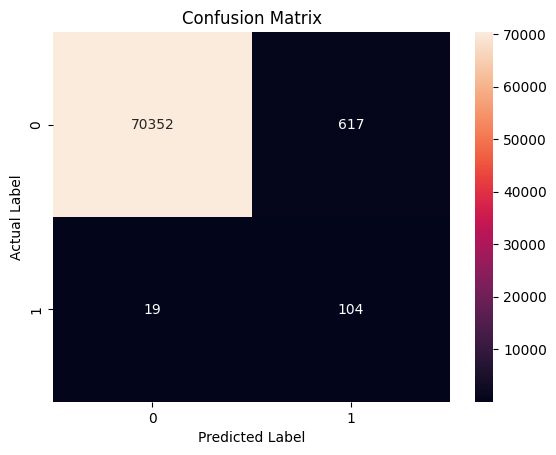

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70969
           1       0.14      0.85      0.25       123

    accuracy                           0.99     71092
   macro avg       0.57      0.92      0.62     71092
weighted avg       1.00      0.99      0.99     71092

AUROC Score: 0.9685782307103743


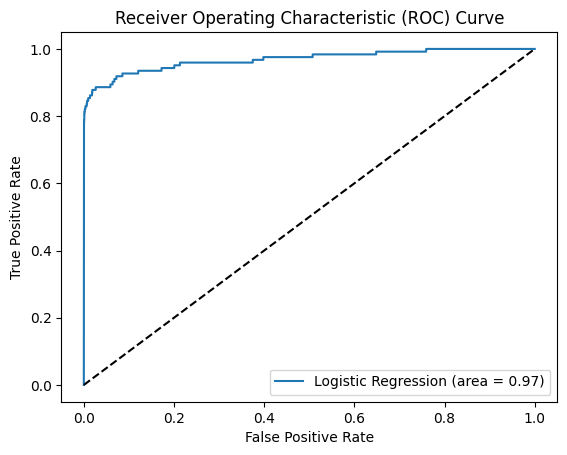

In [ ]:

# Predictions
predictions = model.predict(X_test_df)

# Confusion Matrix
cm = confusion_matrix(y_test_df, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print(classification_report(y_test_df, predictions))

# AUROC Curve
# Compute predicted probabilities
y_pred_prob = model.predict_proba(X_test_df)[:, 1]
# Calculate AUROC score
auroc_score = roc_auc_score(y_test_df, y_pred_prob)
print(f'AUROC Score: {auroc_score}')

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_df, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auroc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
